**Tecnológico de Monterrey**

**Maestría en Inteligencia Artificial Aplicada**

**ASIGNATURA: Proyecto Integrador**

**PROFESOR TITULAR: Dra. Grettel Barceló Alonso**

**ACTIVIDAD:Avance 1. Análisis Exploratorio de Datos**

---
**EQUIPO 3**

*   Rayan Bahrein García Fabián - A01204055
*   Brandon Alexis del Ángel Gómez - A01795429
*   Fernando Jiménez Pereyra - A01734609

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Poyecto/Datos"
os.chdir(DIR)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from datetime import datetime
from scipy.stats import zscore

In [2]:
empleados = pd.read_csv('HR ALL.csv')
proyectos = pd.read_csv('proyectos.csv')
asignaciones = pd.read_csv('asignacion_proyectos.csv')

# Estructura de los datos

Descripción general y tipos de datos

In [3]:
# Empleados
print("\n Estructura de empleados")
display(empleados.info())

columnas_num = empleados.select_dtypes(include=['int64', 'float64']).columns
columnas_text = empleados.select_dtypes(include=['object']).columns

print("Columnas numéricas:", len(columnas_num))
print("Columnas texto:", len(columnas_text))


 Estructura de empleados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3000 non-null   int64  
 1   EmpID                       3000 non-null   int64  
 2   FirstName                   3000 non-null   object 
 3   LastName                    3000 non-null   object 
 4   StartDate                   3000 non-null   object 
 5   ExitDate                    1533 non-null   object 
 6   Title                       3000 non-null   object 
 7   Supervisor                  3000 non-null   object 
 8   ADEmail                     3000 non-null   object 
 9   BusinessUnit                3000 non-null   object 
 10  EmployeeStatus              3000 non-null   object 
 11  EmployeeType                3000 non-null   object 
 12  PayZone                     3000 non-null   object 
 13  Employe

None

Columnas numéricas: 9
Columnas texto: 33


In [4]:
# Proyectos
print("\n Estructura de proyectos")
display(proyectos.info())

columnas_num = proyectos.select_dtypes(include=['int64', 'float64']).columns
columnas_text = proyectos.select_dtypes(include=['object']).columns

print("Columnas numéricas:", len(columnas_num))
print("Columnas texto:", len(columnas_text))


 Estructura de proyectos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Project ID          3000 non-null   object
 1   Project Name        3000 non-null   object
 2   Categoria           3000 non-null   object
 3   Start Date          3000 non-null   object
 4   End Date            3000 non-null   object
 5   Complexity          3000 non-null   int64 
 6   Skills              3000 non-null   object
 7   Recursos Asignados  3000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 187.6+ KB


None

Columnas numéricas: 2
Columnas texto: 6


In [5]:
# Asignaciones
print("\n Estructura de asignaciones")
display(asignaciones.info())

columnas_num = asignaciones.select_dtypes(include=['int64', 'float64']).columns
columnas_text = asignaciones.select_dtypes(include=['object']).columns

print("Columnas numéricas:", len(columnas_num))
print("Columnas texto:", len(columnas_text))


 Estructura de asignaciones
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31864 entries, 0 to 31863
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Project ID          31864 non-null  object 
 1   EmpID               31864 non-null  int64  
 2   Role                31864 non-null  object 
 3   Contribution Score  31864 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 995.9+ KB


None

Columnas numéricas: 2
Columnas texto: 2


Valores faltantes

In [ ]:
print("\Valores faltantes por columna - Empleados")
display(empleados.isnull().sum().sort_values(ascending=False))

print("\Valores faltantes por columna - Proyectos")
display(proyectos.isnull().sum().sort_values(ascending=False))

print("\Valores faltantes por columna - Asignaciones")
display(asignaciones.isnull().sum().sort_values(ascending=False))

\Valores faltantes por columna - Empleados


ExitDate                      1467
TerminationDescription        1467
EmpID                            0
FirstName                        0
LastName                         0
StartDate                        0
Title                            0
Supervisor                       0
ADEmail                          0
Unnamed: 0                       0
BusinessUnit                     0
EmployeeStatus                   0
PayZone                          0
EmployeeType                     0
EmployeeClassificationType       0
TerminationType                  0
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
Training Date                    0
Training Program Name            0
Training Type                    0
Training Outcome                 0
Location                         0
Trainer                          0
Training Duration(Days)          0
Training Cost                    0
Survey Date                      0
Engagement Score                 0
Satisfaction Score               0
Work-Life Balance Score          0
Skill Principal                  0
Skill Secundaria                 0
Skill Adicional                  0
dtype: int64

\Valores faltantes por columna - Proyectos


Project ID            0
Project Name          0
Categoria             0
Start Date            0
End Date              0
Complexity            0
Skills                0
Recursos Asignados    0
dtype: int64

\Valores faltantes por columna - Asignaciones


Project ID            0
EmpID                 0
Role                  0
Contribution Score    0
dtype: int64

Comentarios:

En el dataset 'empleados', las columnas `ExitDate` y `TerminationDescription` tienen valores faltantes, lo cual es de esperar ya que la base de datos contiene información de colaboradores activos e inactivos.

Los data sets de 'proyectos' y 'asignaciones' no presentan valores nulos en variables críticas.

Estadísticas descriptivas numéricas

In [ ]:
display(empleados.describe())

print("\Estadísticas descriptivas - Proyectos (numéricas)")
display(proyectos.describe())

print("\Estadísticas descriptivas - Asignaciones (numéricas)")
display(asignaciones.describe())

Unnamed: 0        EmpID  LocationCode  Current Employee Rating  \
count  3000.000000  3000.000000   3000.000000              3000.000000   
mean   1499.500000  2500.500000  44997.180667                 2.969000   
std     866.169729   866.169729  29987.331783                 1.015078   
min       0.000000  1001.000000   1013.000000                 1.000000   
25%     749.750000  1750.750000  17546.000000                 2.000000   
50%    1499.500000  2500.500000  44150.500000                 3.000000   
75%    2249.250000  3250.250000  71481.250000                 3.000000   
max    2999.000000  4000.000000  98052.000000                 5.000000   

       Training Duration(Days)  Training Cost  Engagement Score  \
count              3000.000000    3000.000000       3000.000000   
mean                  2.975667     558.628697          2.939667   
std                   1.417890     263.217698          1.433426   
min                   1.000000     100.040000          1.000000   
25%                   2.000000     327.587500          2.000000   
50%                   3.000000     572.125000          3.000000   
75%                   4.000000     786.987500          4.000000   
max                   5.000000     999.970000          5.000000   

       Satisfaction Score  Work-Life Balance Score  
count         3000.000000              3000.000000  
mean             3.022000                 2.989000  
std              1.408845                 1.409329  
min              1.000000                 1.000000  
25%              2.000000                 2.000000  
50%              3.000000                 3.000000  
75%              4.000000                 4.000000  
max              5.000000                 5.000000

\Estadísticas descriptivas - Proyectos (numéricas)


Complexity  Recursos Asignados
count  3000.000000         3000.000000
mean      3.014667           10.621333
std       1.415552            5.954866
min       1.000000            2.000000
25%       2.000000            5.000000
50%       3.000000           10.000000
75%       4.000000           15.000000
max       5.000000           25.000000

\Estadísticas descriptivas - Asignaciones (numéricas)


EmpID  Contribution Score
count  31864.000000        31864.000000
mean    2503.658863           68.741385
std      840.363977           10.097011
min     1001.000000           40.000000
25%     1795.000000           63.100000
50%     2447.000000           70.100000
75%     3190.250000           76.900000
max     4000.000000           97.800000

Frecuencia de variables categóricas

In [ ]:
def frecuencias_categoricas(df, nombre_df):
    print(f"\Frecuencias en variables categóricas - {nombre_df}")
    for col in df.select_dtypes(include='object').columns:
        print(f"\n▶︎ {col}")
        print(df[col].value_counts().head(10))

frecuencias_categoricas(empleados, "Empleados")
frecuencias_categoricas(proyectos, "Proyectos")
frecuencias_categoricas(asignaciones, "Asignaciones")

\Frecuencias en variables categóricas - Empleados

▶︎ FirstName
FirstName
Harley     9
Justice    7
Taylor     7
Frankie    7
Joel       6
Julia      6
Marilyn    6
Jason      6
Charlie    6
Shamar     6
Name: count, dtype: int64

▶︎ LastName
LastName
Preston       10
Smith         10
York           9
Wiggins        9
Gray           8
Pham           8
Moss           8
Pennington     8
Salazar        8
Anderson       8
Name: count, dtype: int64

▶︎ StartDate
StartDate
04-Mar-22    7
14-Oct-22    7
11-Nov-19    7
18-Jul-19    6
31-May-19    6
16-Nov-22    6
07-Jun-19    6
14-Nov-20    6
26-Feb-22    6
09-Jan-20    6
Name: count, dtype: int64

▶︎ ExitDate
ExitDate
02-Jul-23    8
21-Jul-23    8
09-Jul-23    7
25-Jul-23    7
30-Jul-23    7
23-Jun-23    7
28-Jul-23    7
22-Mar-23    7
26-Apr-23    6
03-Sep-22    6
Name: count, dtype: int64

▶︎ Title
Title
Production Technician I     1321
Production Technician II     516
Area Sales Manager           297
Production Manager           154
Softwa

# Análisis univariante

In [ ]:
# Estilo de los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

Variables numéricas - Histogramas y boxplots

In [ ]:
def graficar_numericas(df, nombre_df):
    print(f"\Variables numéricas en {nombre_df}")
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    for col in num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f"Distribución: {col}")
        sns.boxplot(x=df[col].dropna(), ax=axes[1], color='lightgreen')
        axes[1].set_title(f"Boxplot: {col}")
        plt.suptitle(f"{nombre_df} – {col}", fontsize=14, y=1.05)
        plt.tight_layout()
        plt.show()

Variables categóricas - Barras

In [ ]:
def graficar_categoricas(df, nombre_df):
    print(f"\Variables categóricas en {nombre_df}")
    cat_cols = df.select_dtypes(include="object").columns
    for col in cat_cols:
        if df[col].nunique() <= 20:
            plt.figure(figsize=(10, 4))
            sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")
            plt.title(f"Frecuencia de categorías: {col} ({nombre_df})")
            plt.xlabel("Cantidad")
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

Ejecutamos para cada dataset

\Variables numéricas en Empleados


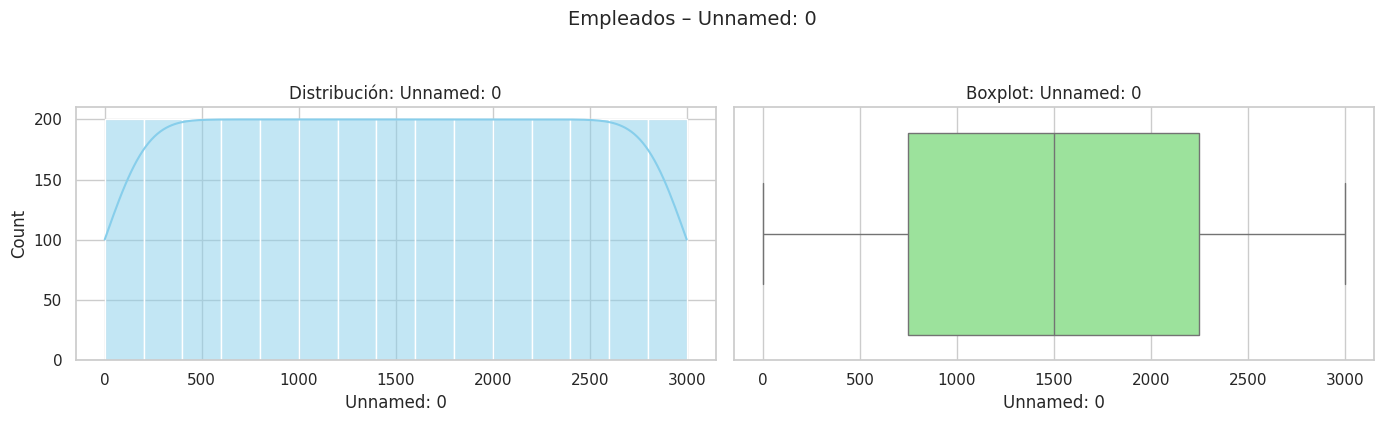

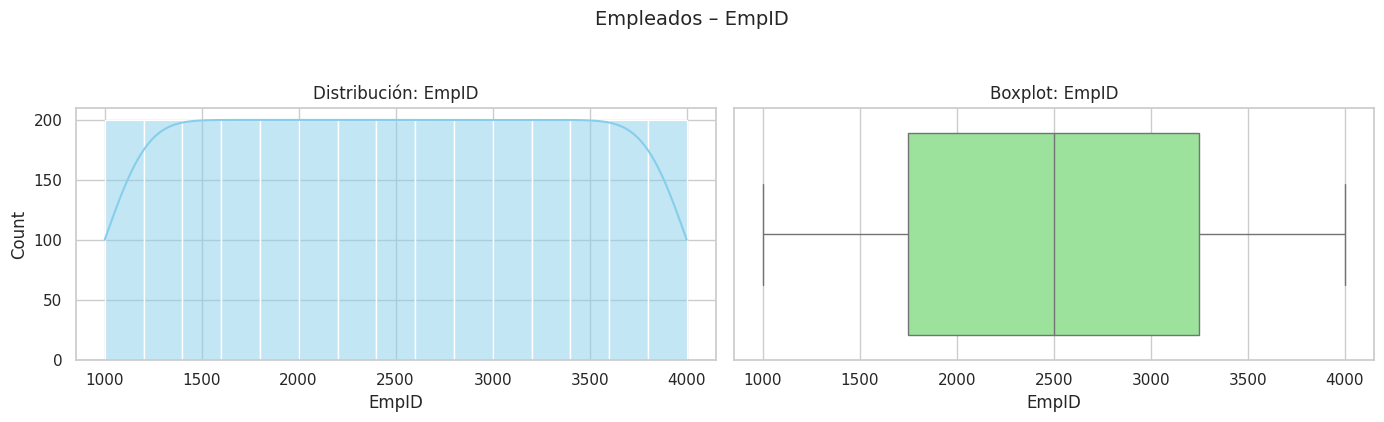

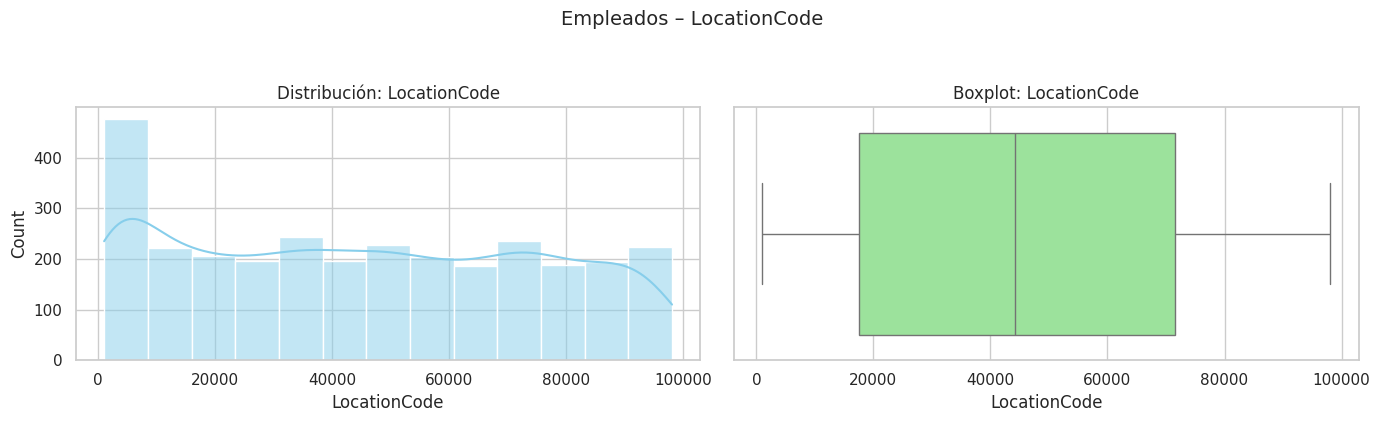

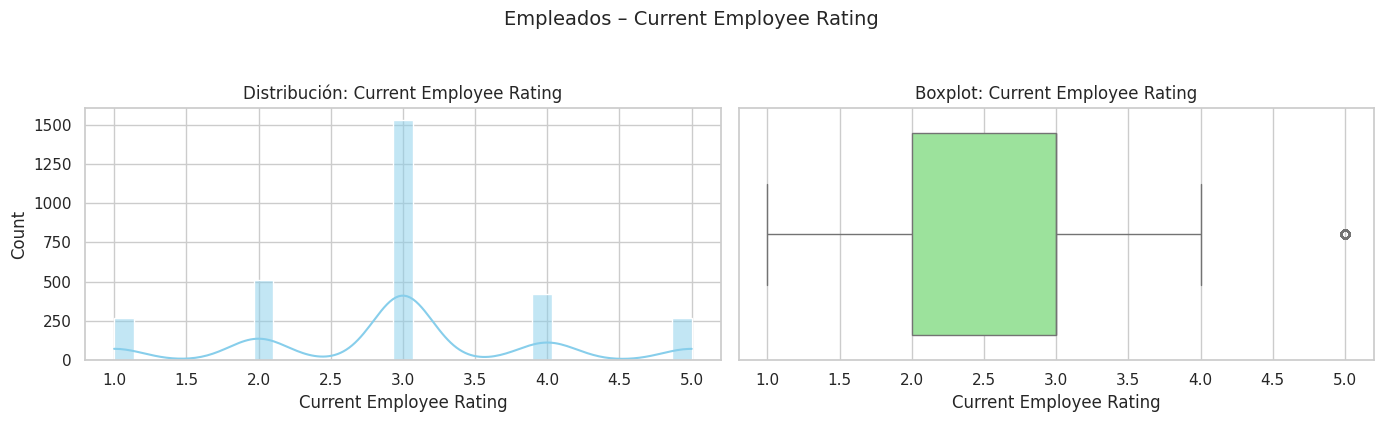

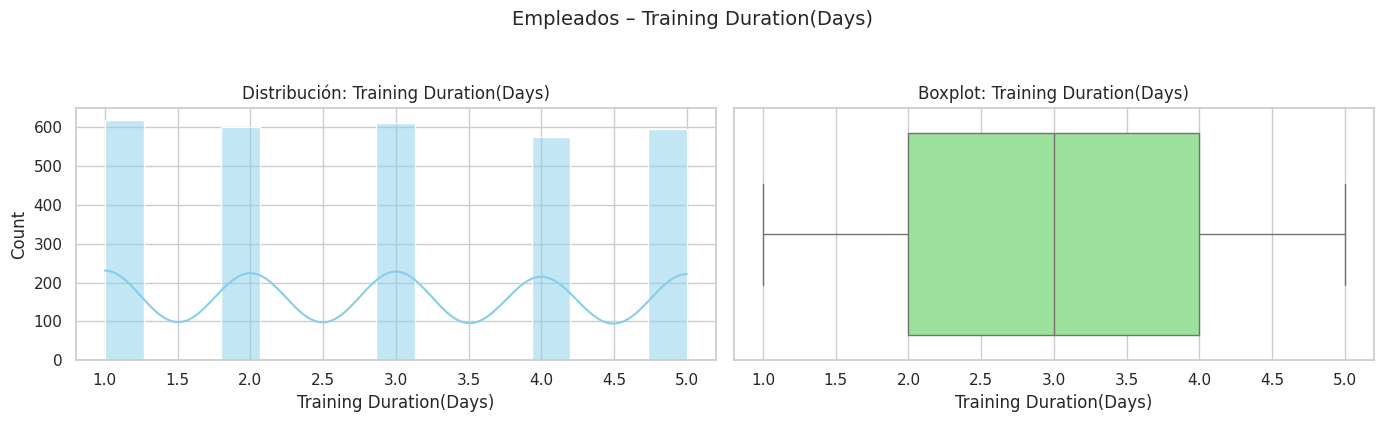

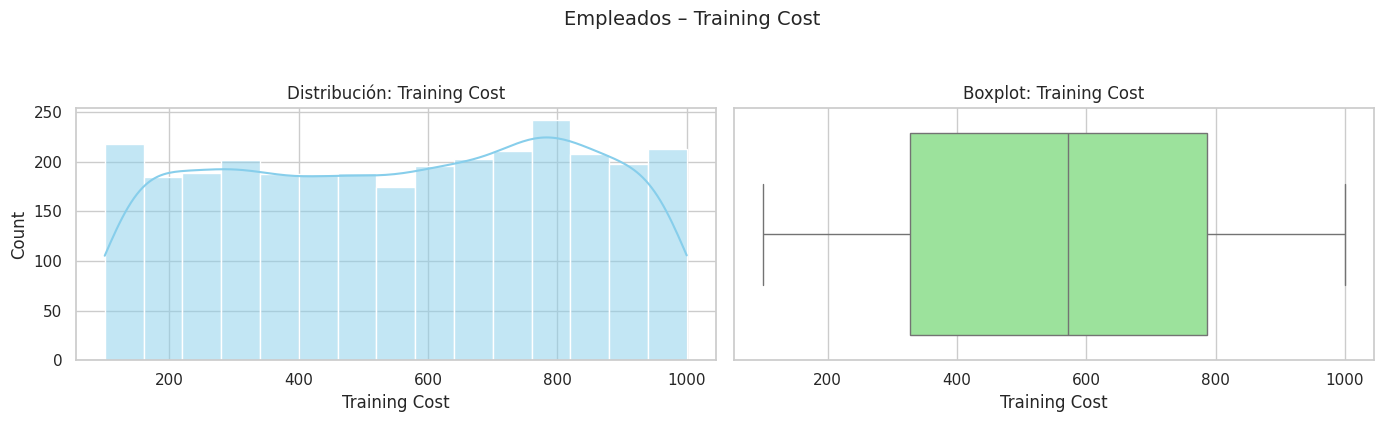

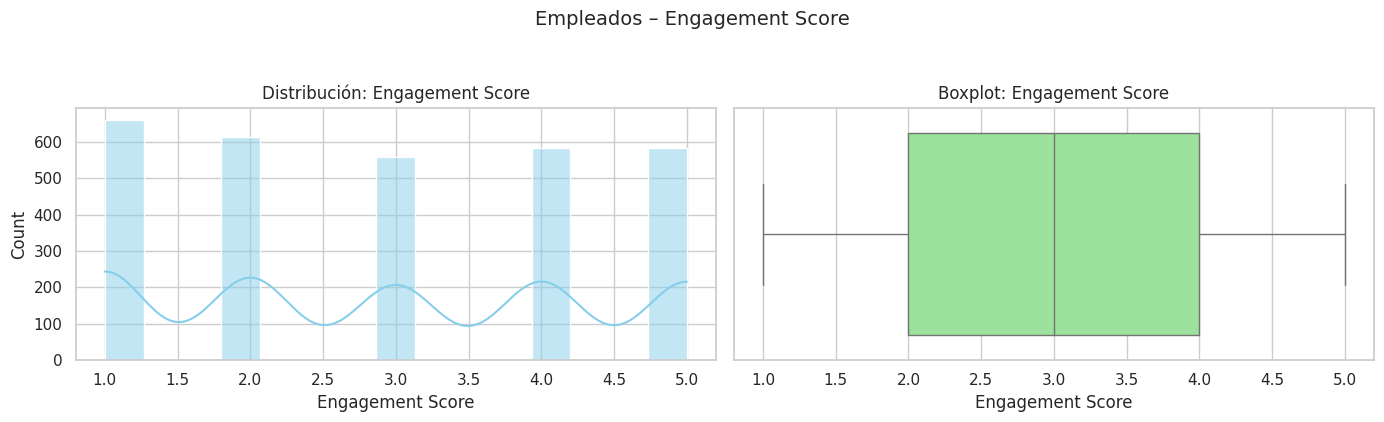

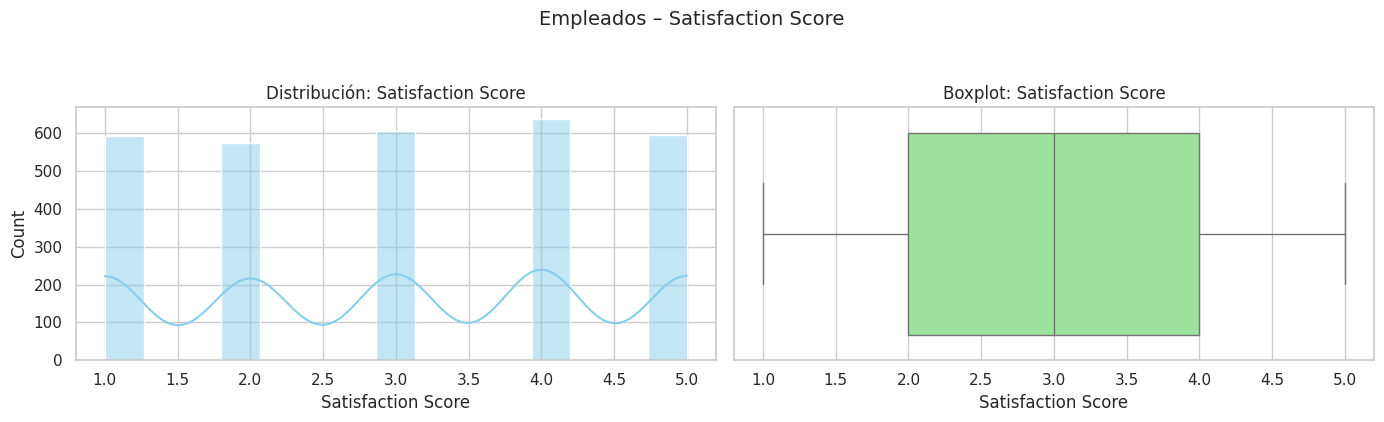

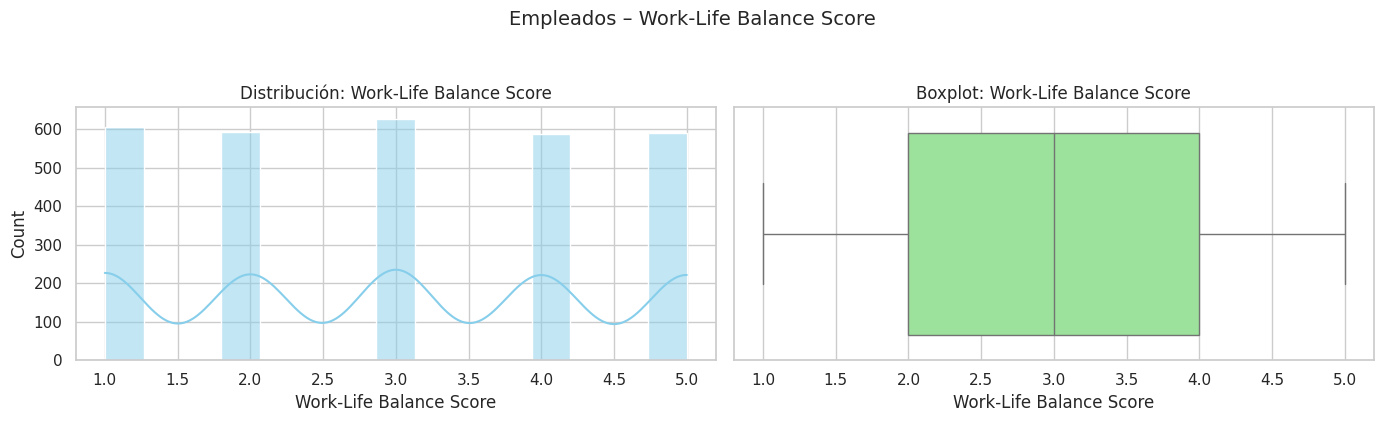

\Variables categóricas en Empleados


<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


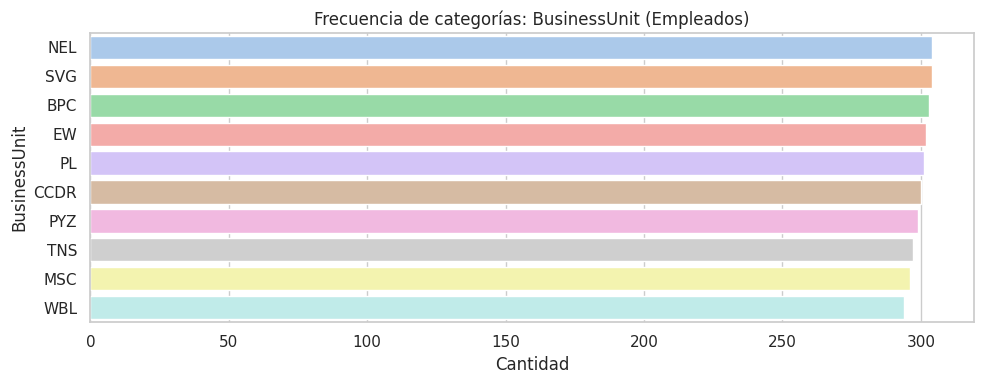

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


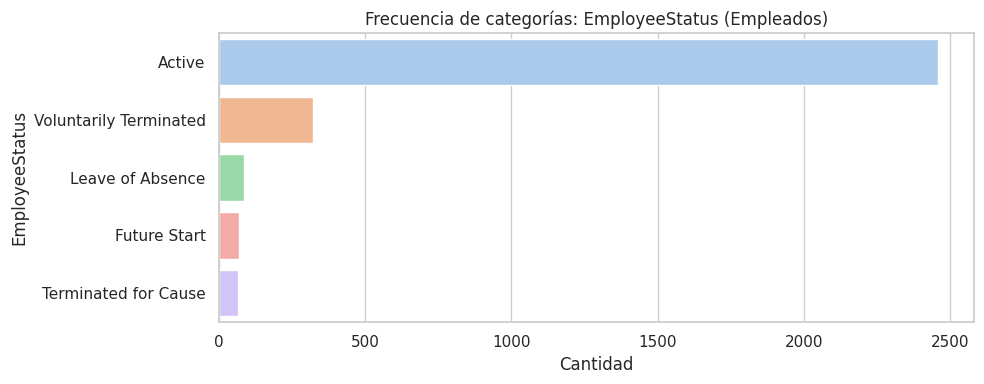

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


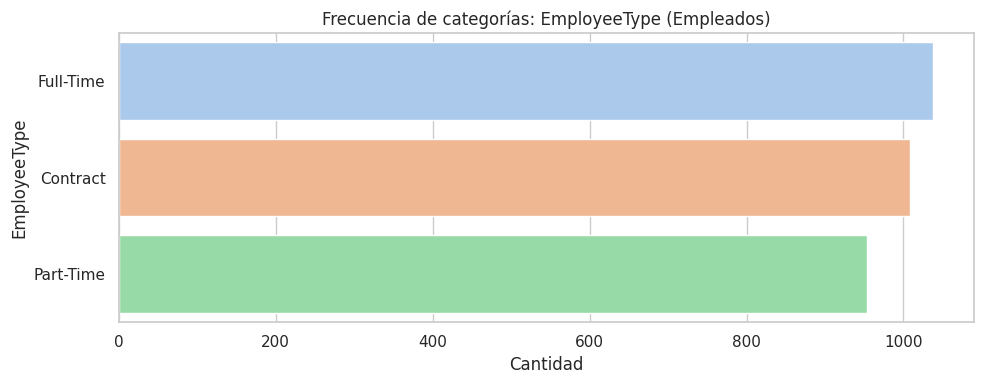

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


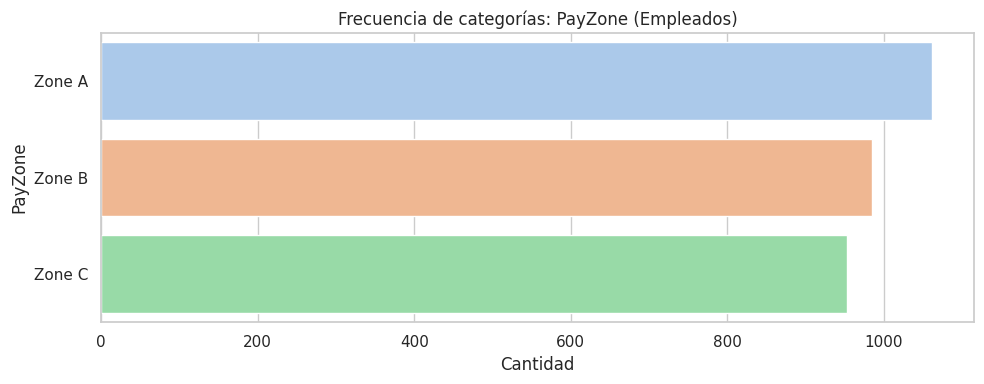

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


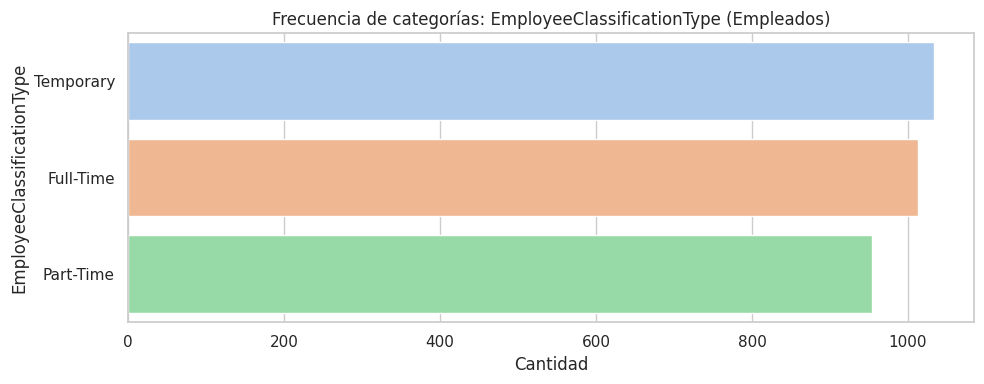

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


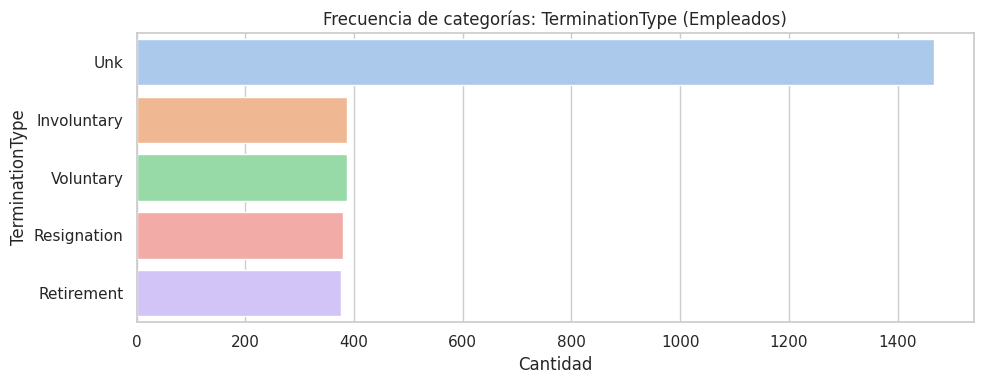

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


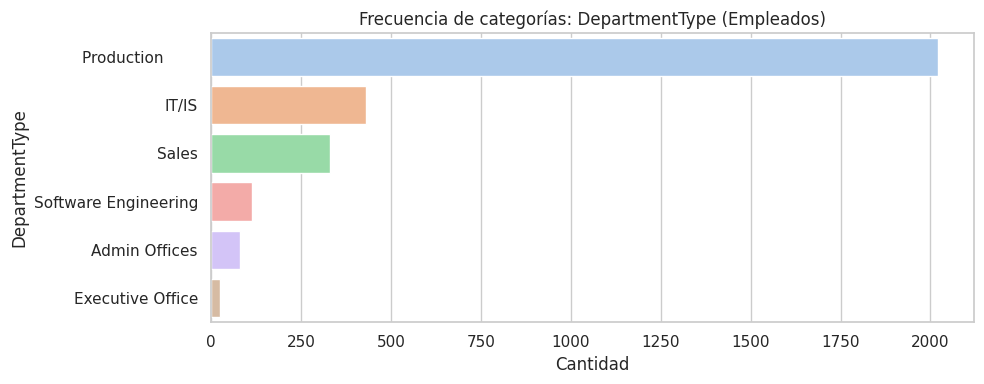

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


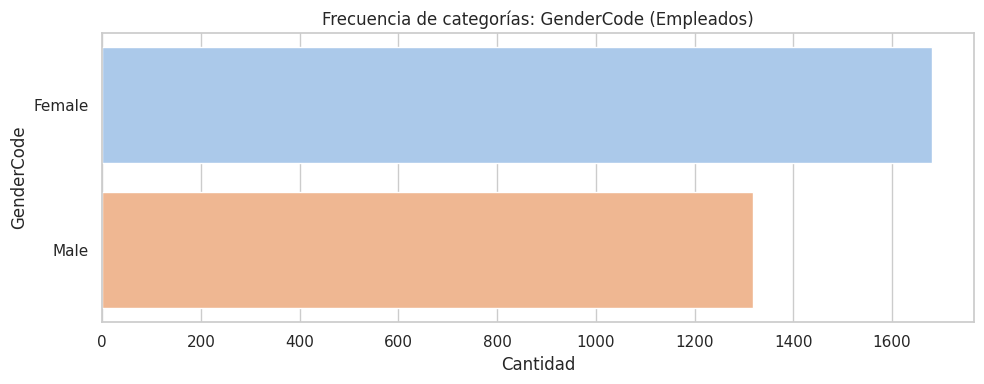

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


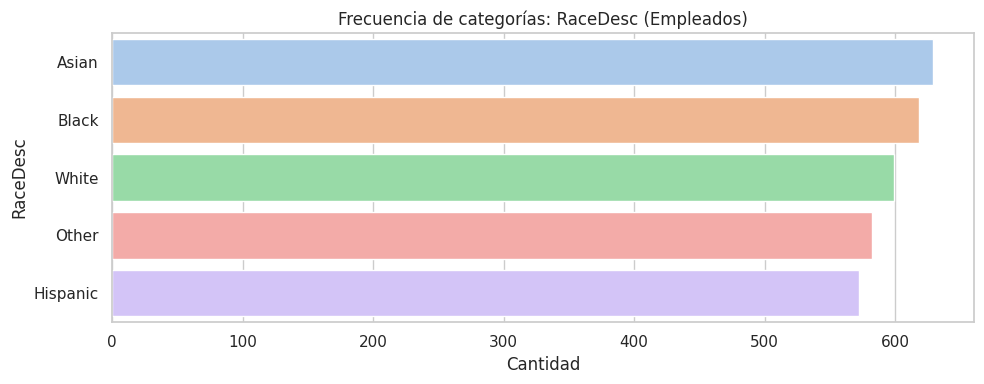

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


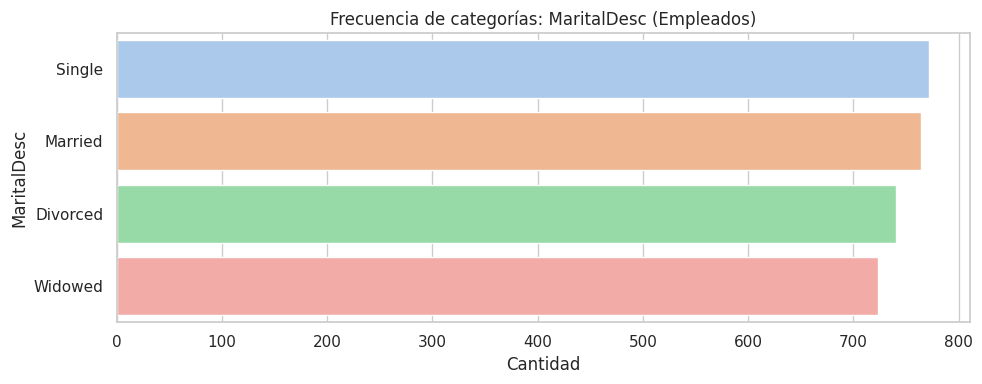

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


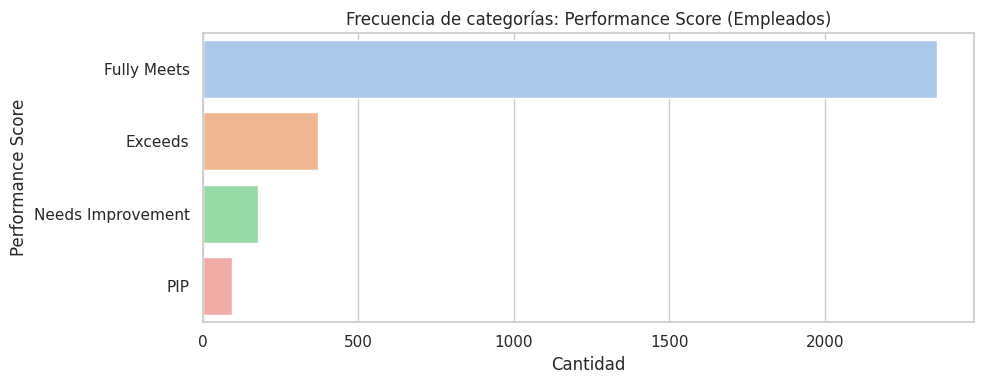

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


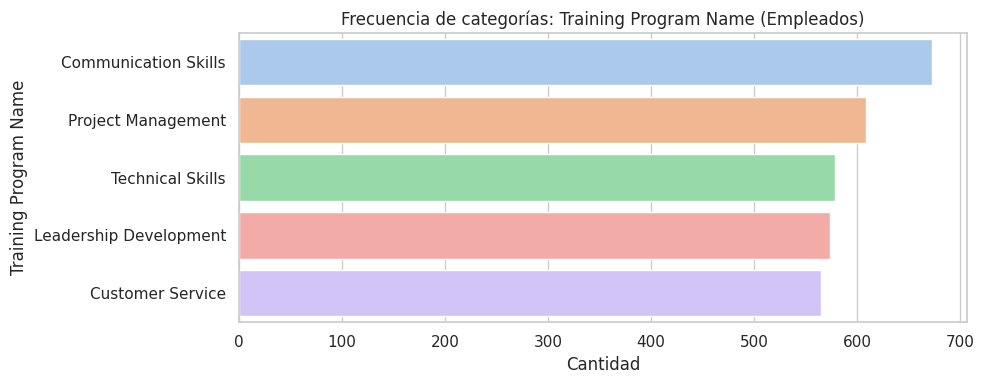

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


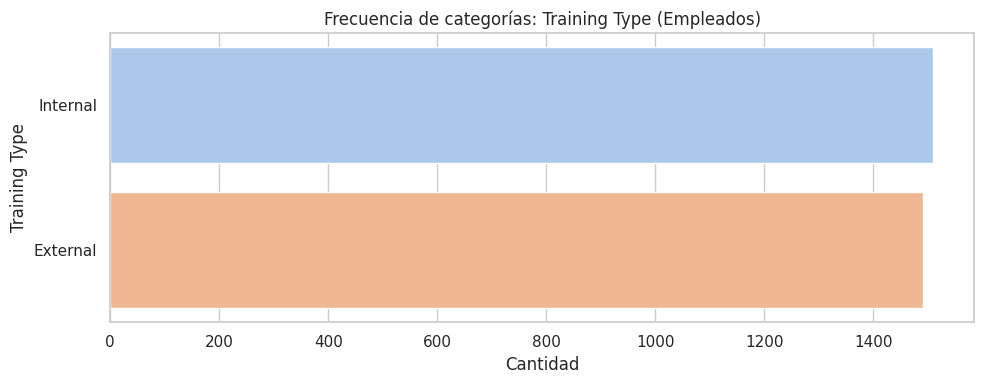

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


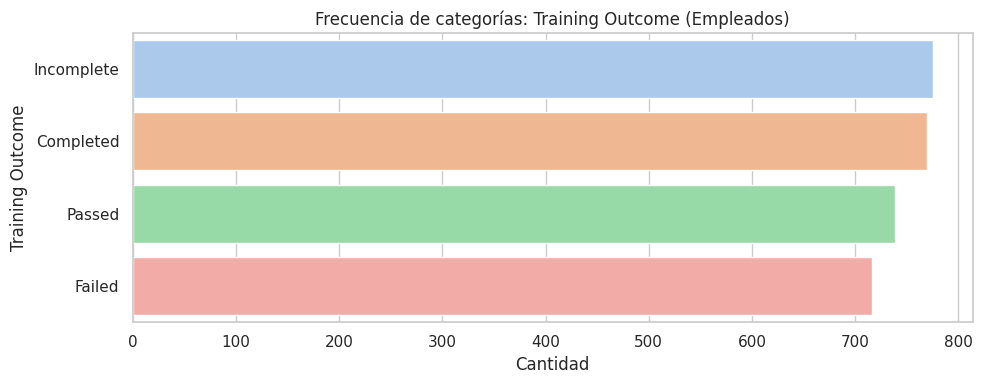

<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


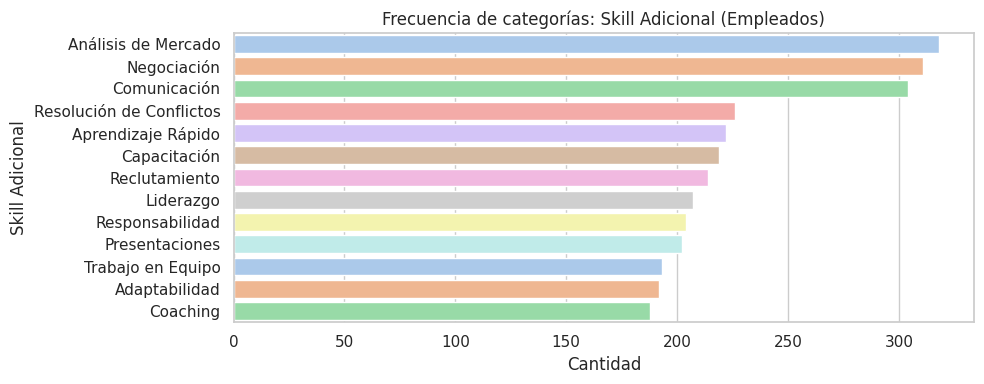

In [ ]:
# Empleados
graficar_numericas(empleados, "Empleados")
graficar_categoricas(empleados, "Empleados")


\Variables numéricas en Proyectos


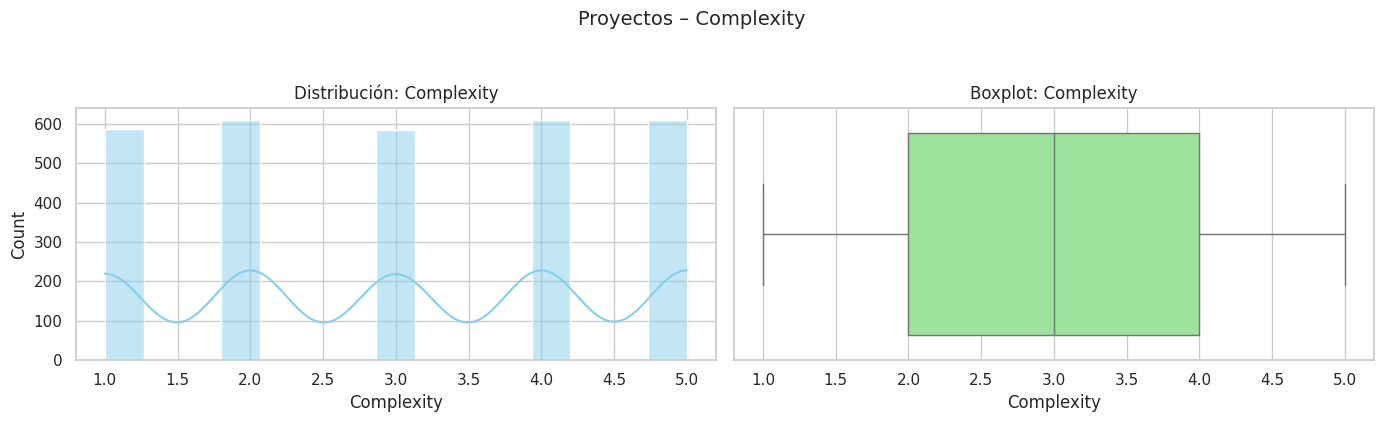

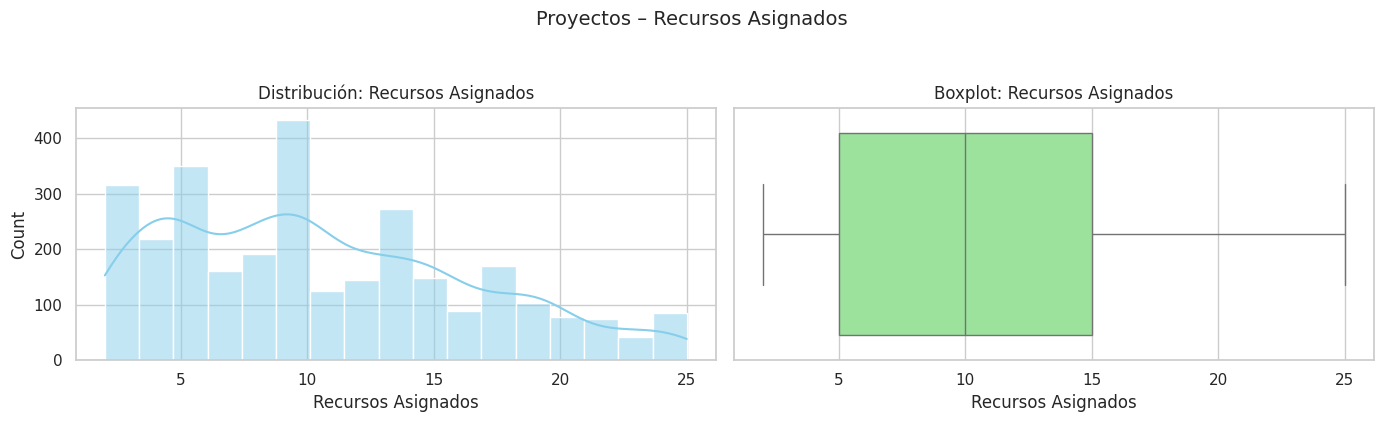

\Variables categóricas en Proyectos


<ipython-input-20-bab96ae5fefa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")


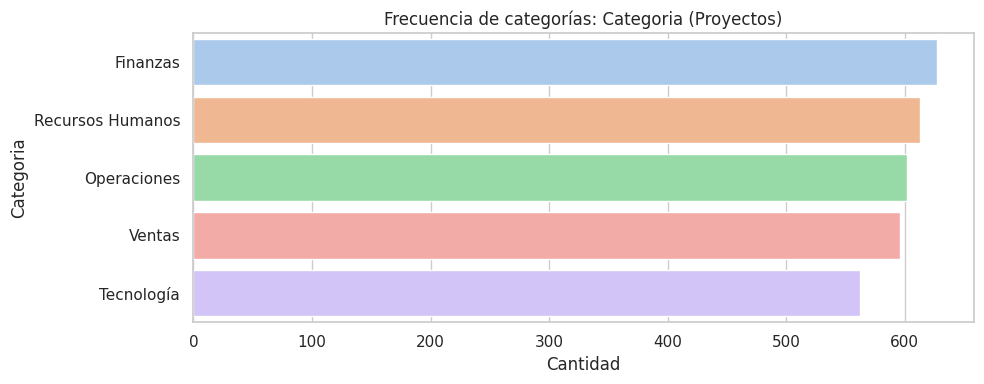

In [ ]:
# Proyectos
graficar_numericas(proyectos, "Proyectos")
graficar_categoricas(proyectos, "Proyectos")

\Variables numéricas en Asignaciones


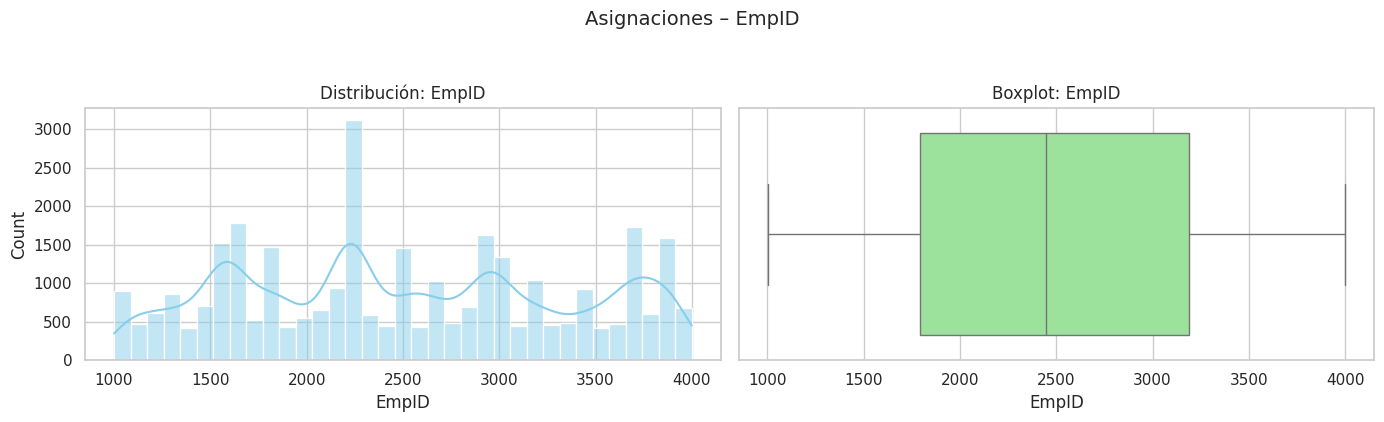

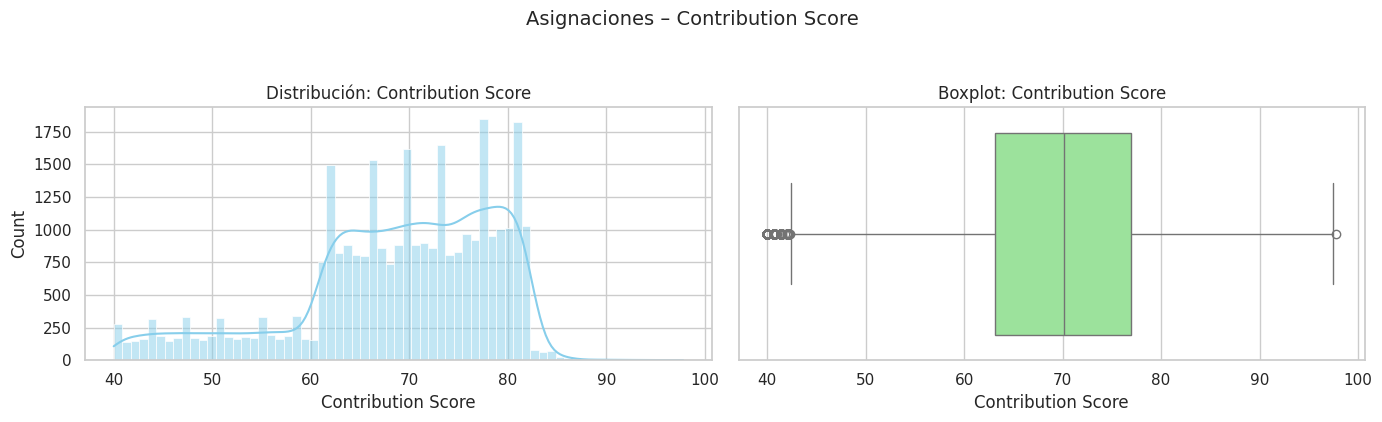

\Variables categóricas en Asignaciones


In [ ]:
# Asignaciones
graficar_numericas(asignaciones, "Asignaciones")
graficar_categoricas(asignaciones, "Asignaciones")

# Análisis bi/multivariante

Matrices de correlación

In [ ]:
def matriz_correlacion(df, nombre_df):
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    if len(num_cols) < 2:
        print(f"⚠️ No hay suficientes variables numéricas en {nombre_df} para calcular correlación.")
        return
    corr = df[num_cols].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title(f"Matriz de correlación – {nombre_df}")
    plt.show()

Boxplots categórica vs nmérica

In [ ]:
def boxplot_cat_num(df, nombre_df):
    cat_cols = df.select_dtypes(include="object").columns
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns

    for cat in cat_cols:
        if df[cat].nunique() <= 6:  # limitar categorías para visualización clara
            for num in num_cols:
                plt.figure(figsize=(8, 4))
                sns.boxplot(data=df, x=cat, y=num, palette="pastel")
                plt.title(f"{num} según {cat} – {nombre_df}")
                plt.xticks(rotation=30)
                plt.tight_layout()
                plt.show()

Ejecutamos para cada dataset

\Correlaciones en EMPLEADOS


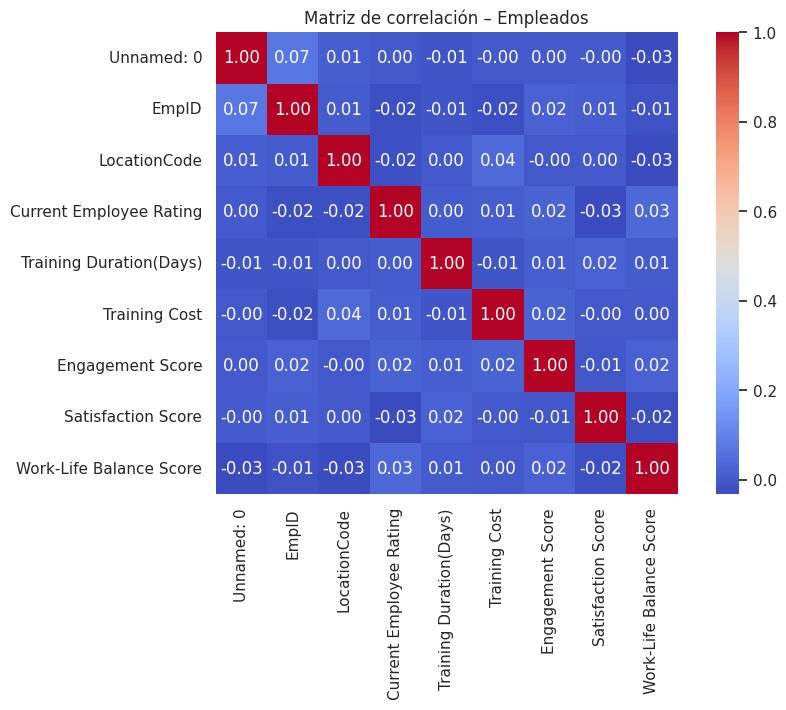

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


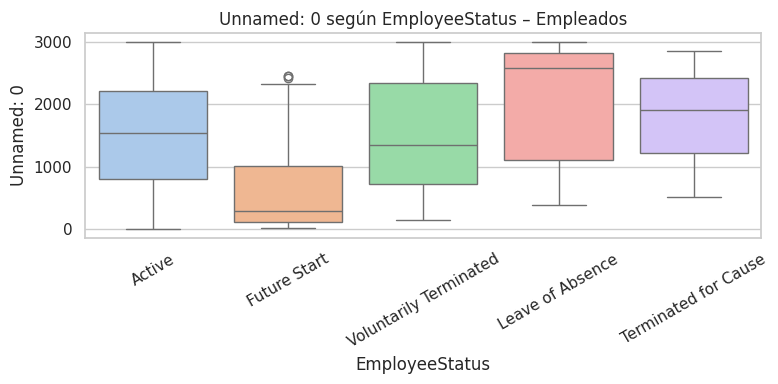

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


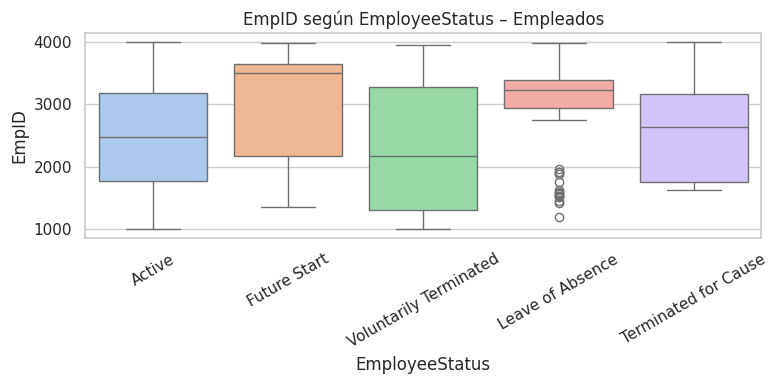

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


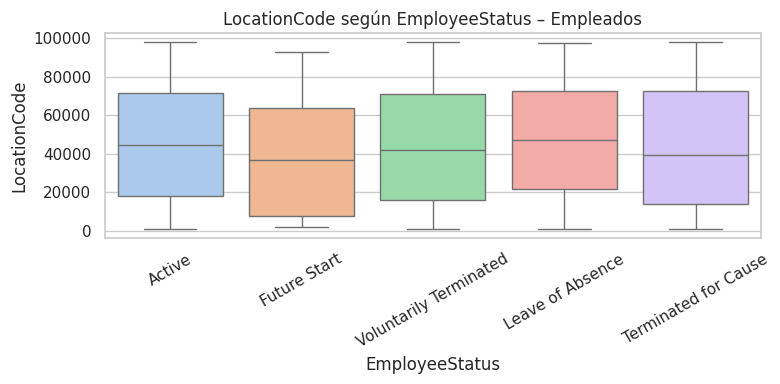

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


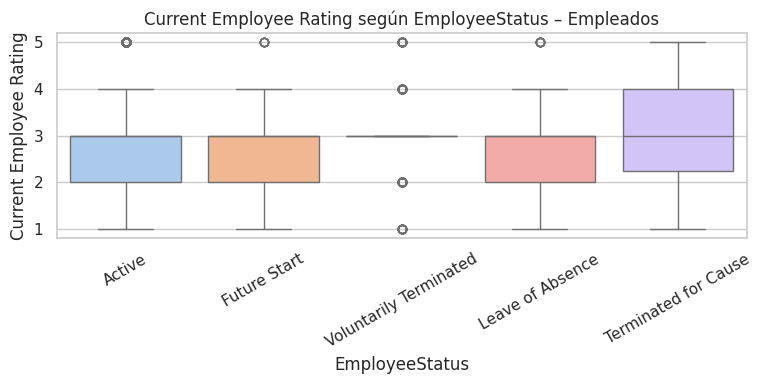

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


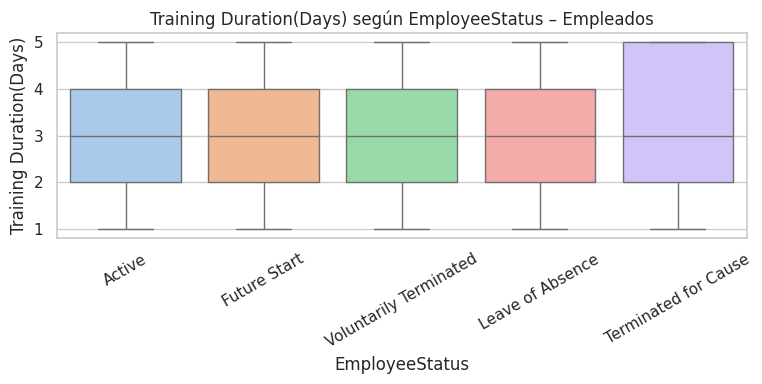

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


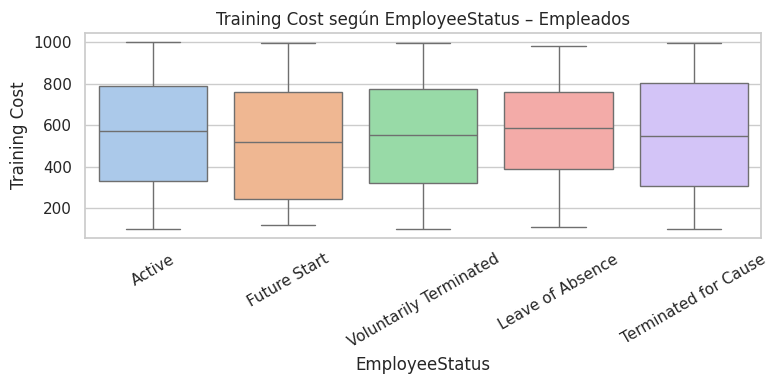

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


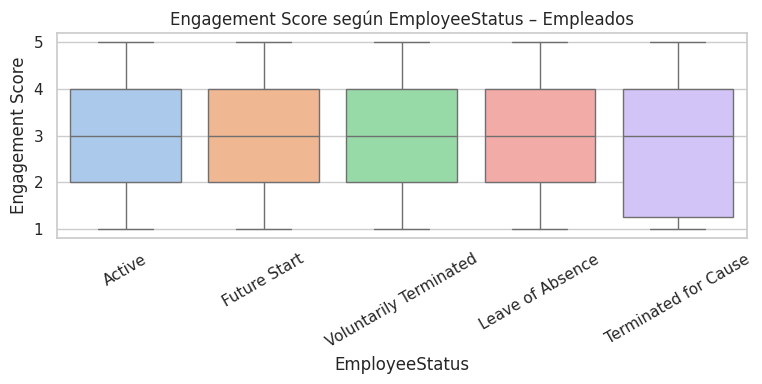

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


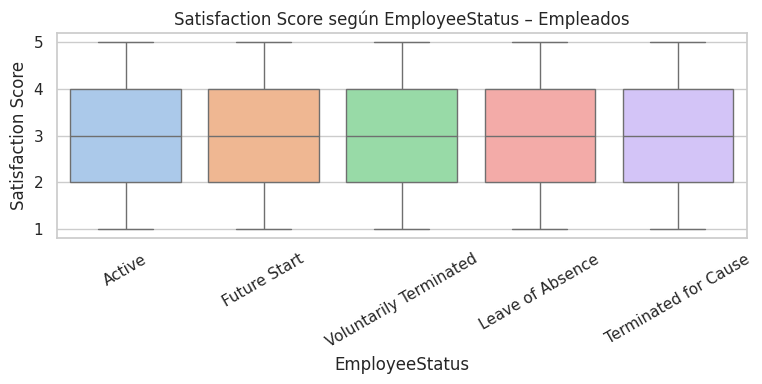

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


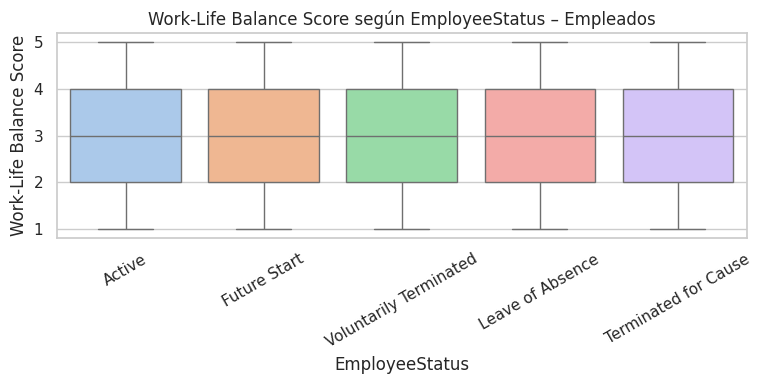

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


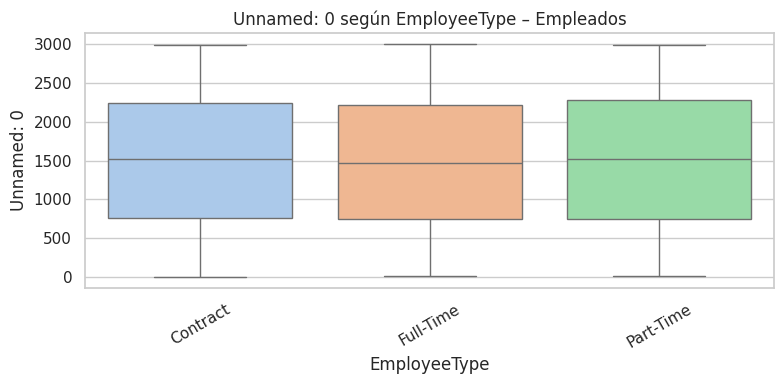

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


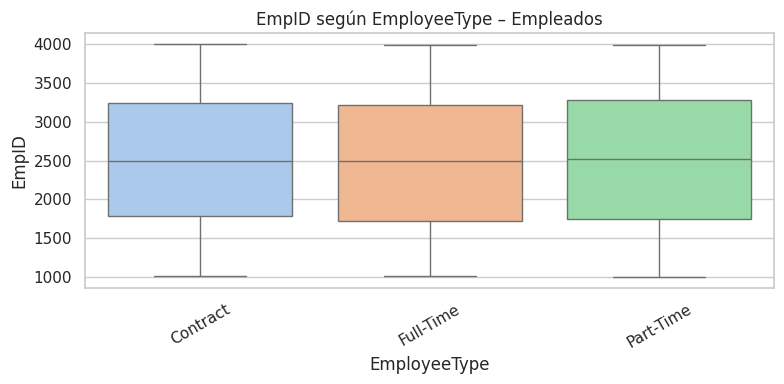

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


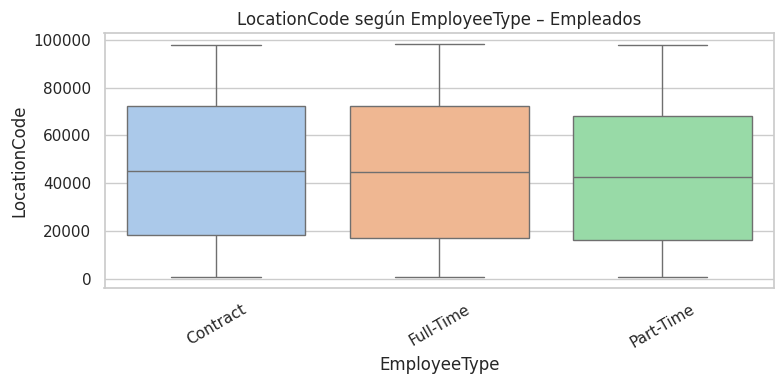

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


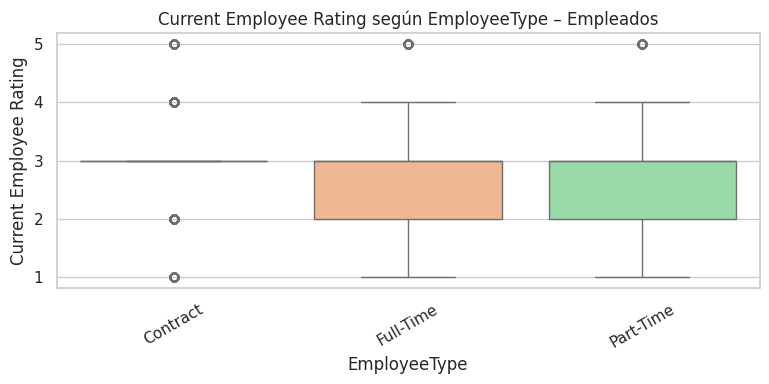

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


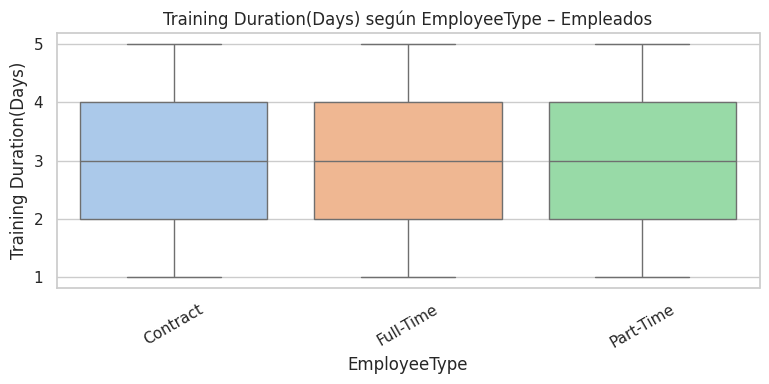

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


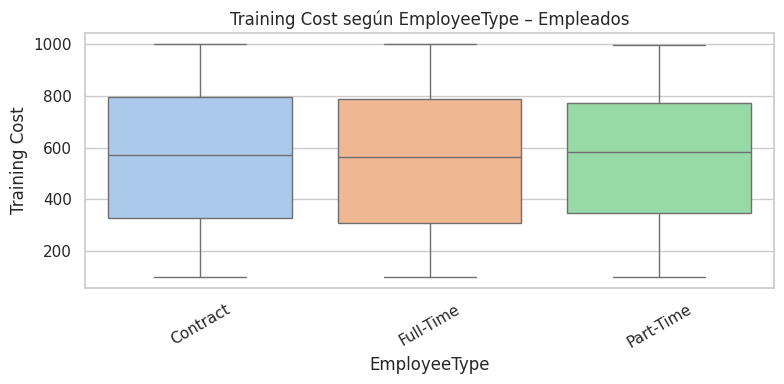

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


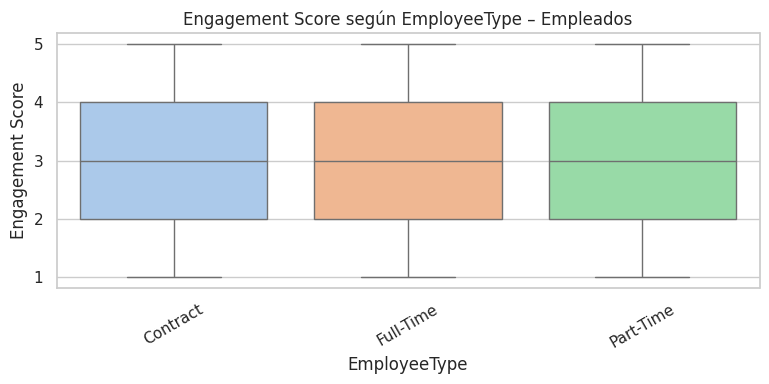

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


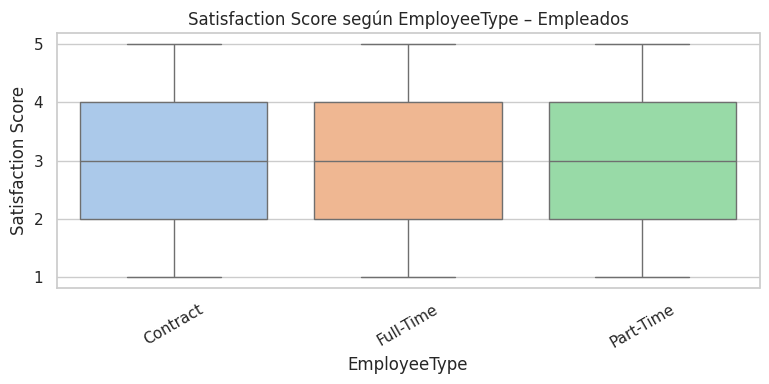

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


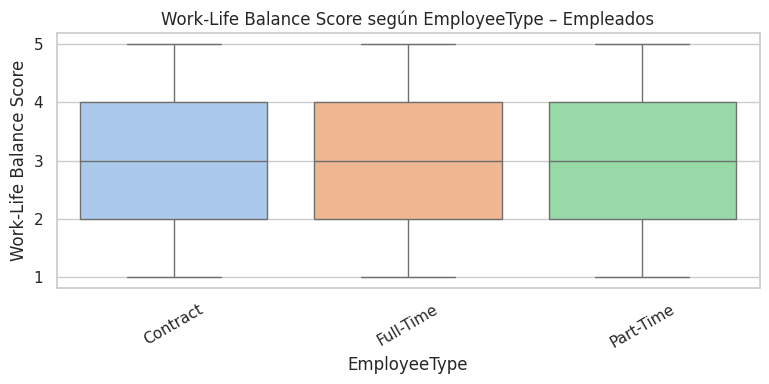

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


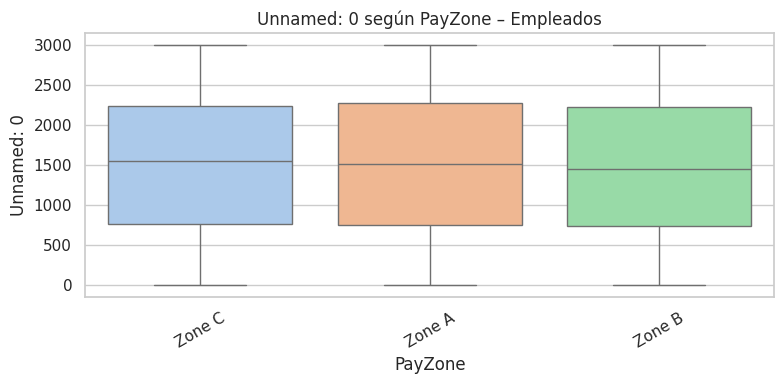

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


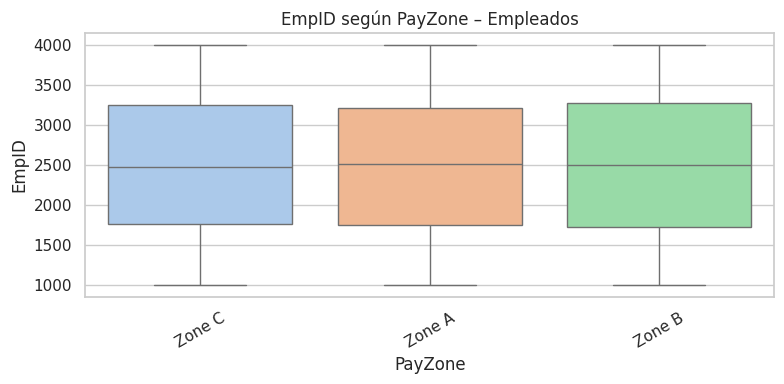

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


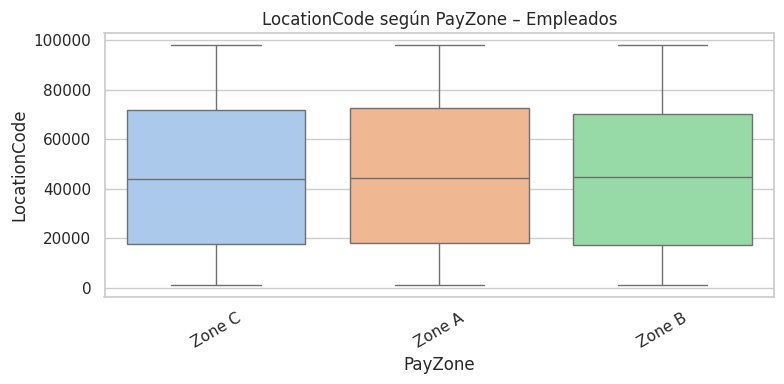

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


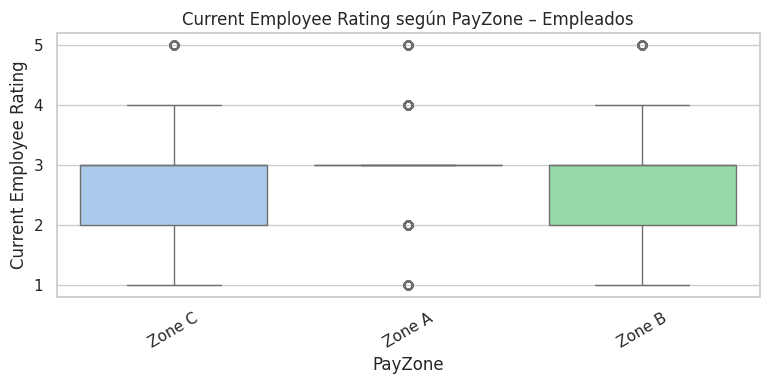

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


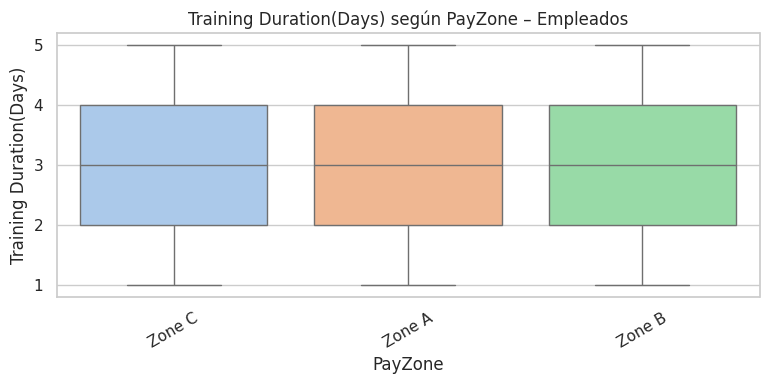

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


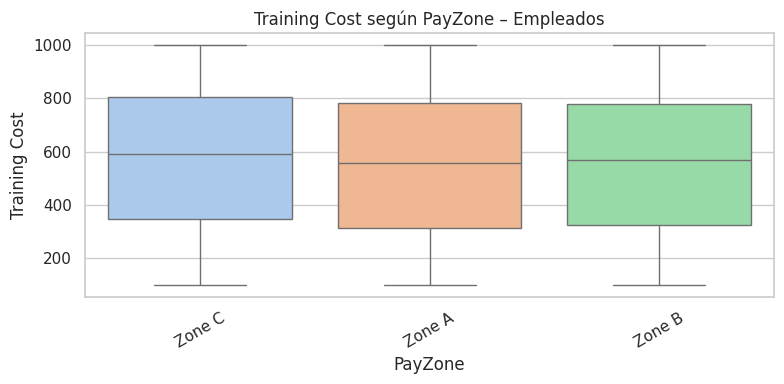

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


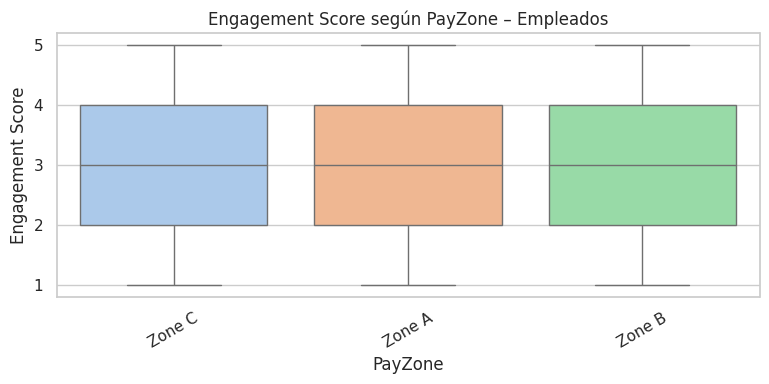

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


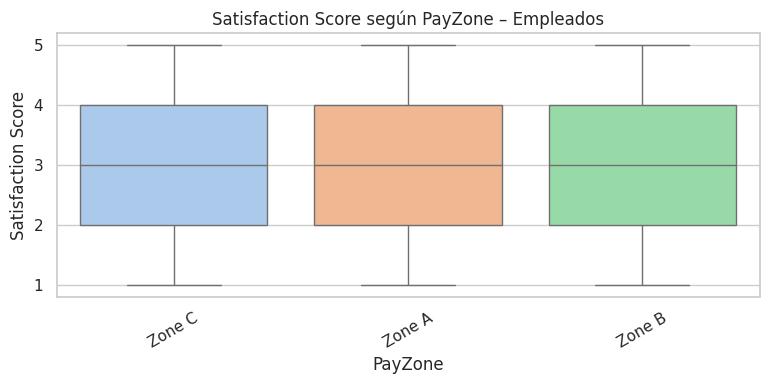

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


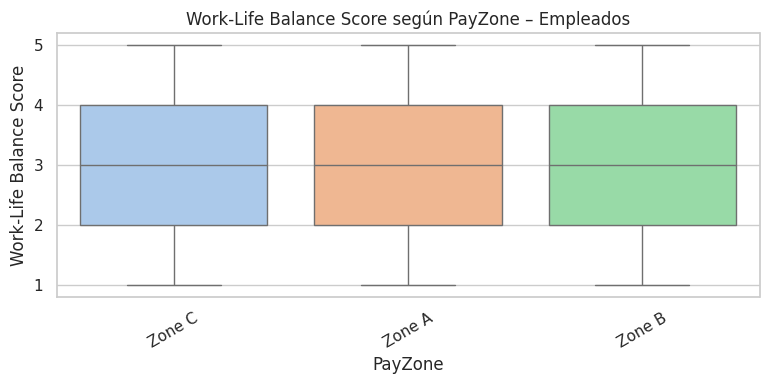

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


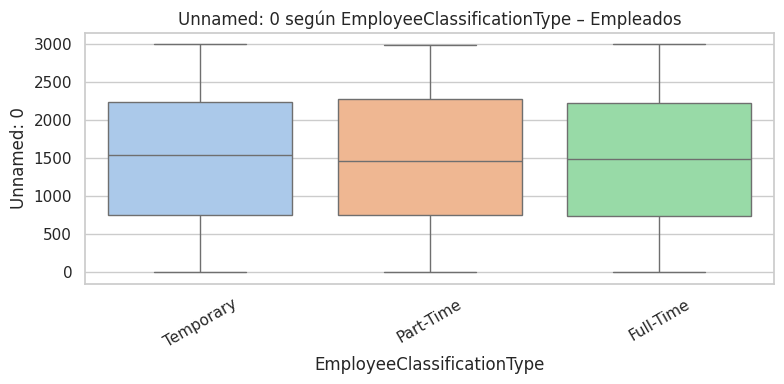

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


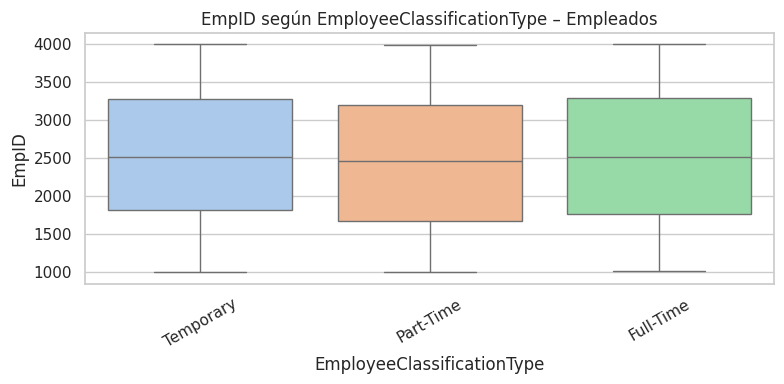

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


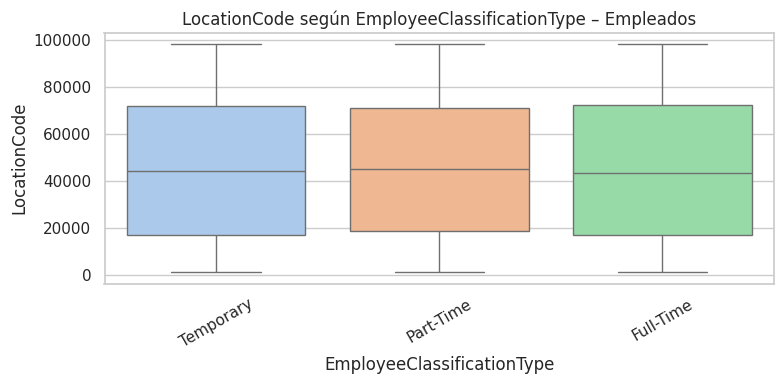

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


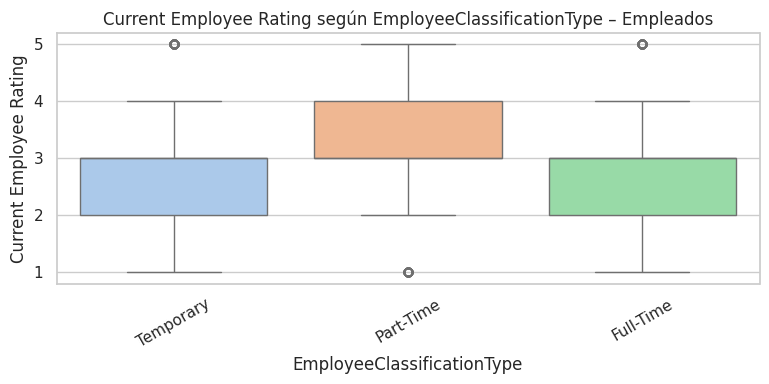

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


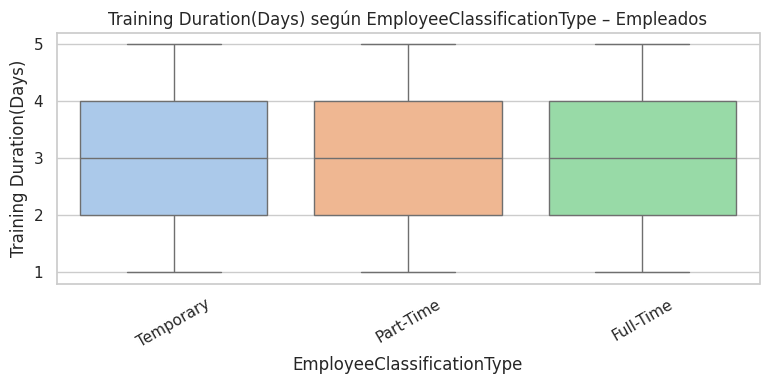

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


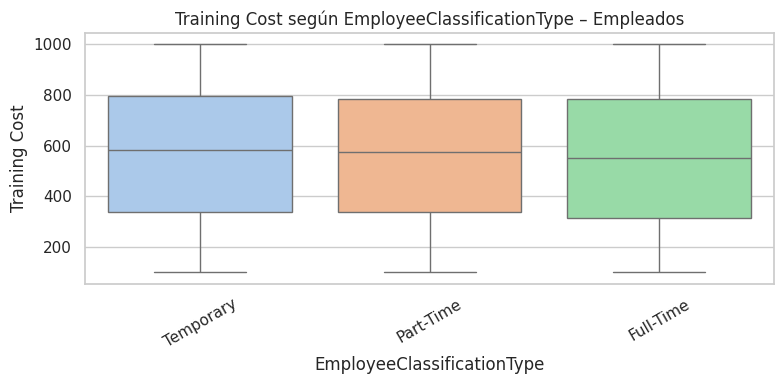

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


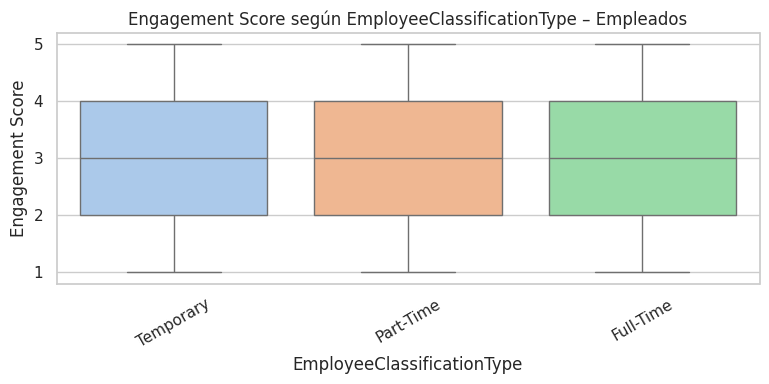

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


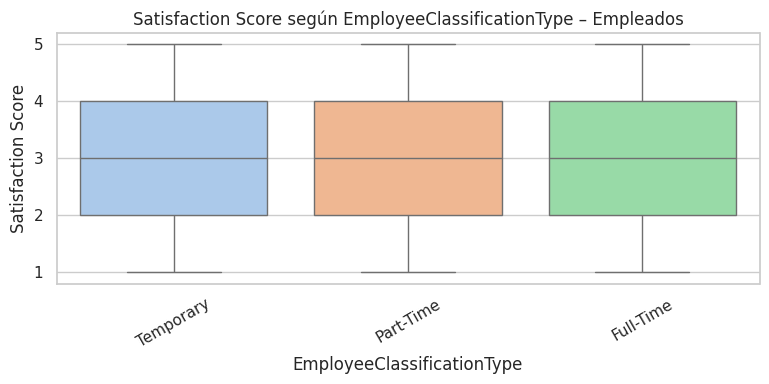

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


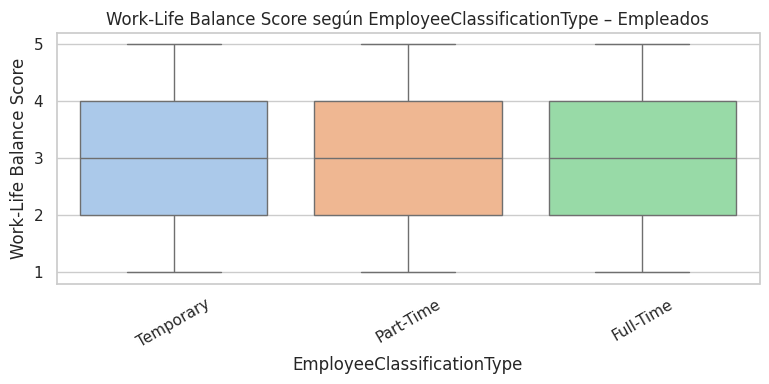

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


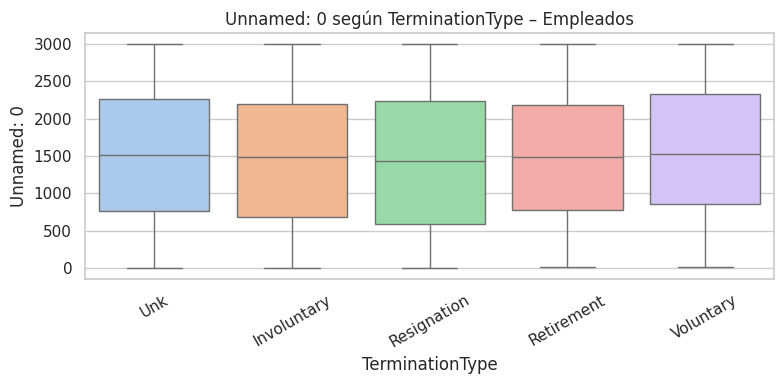

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


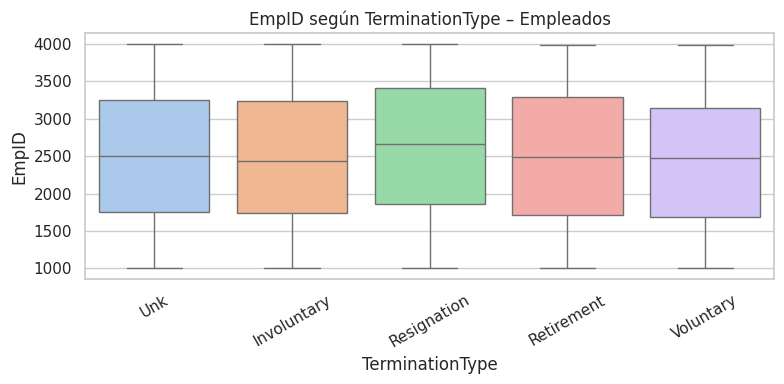

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


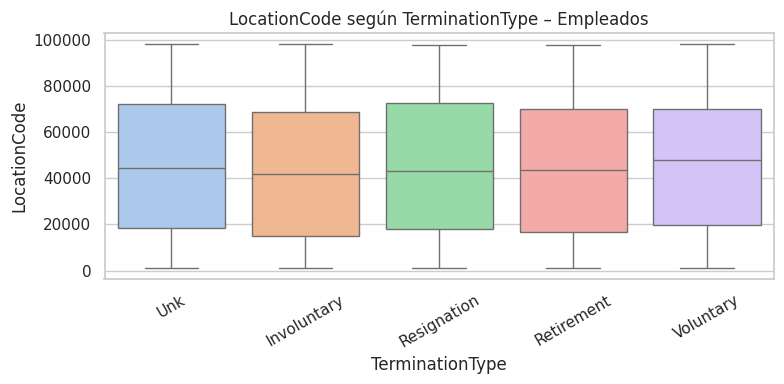

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


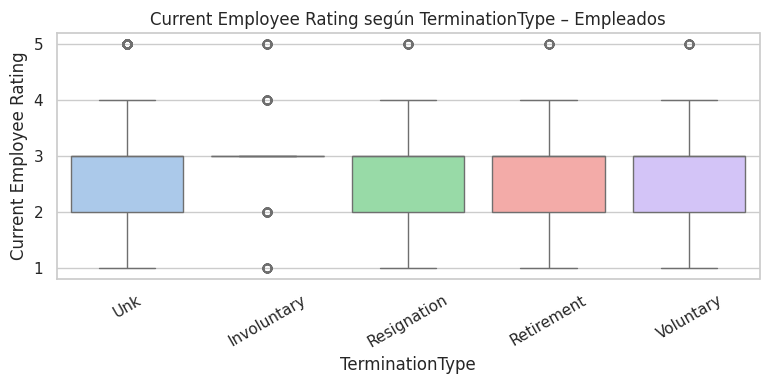

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


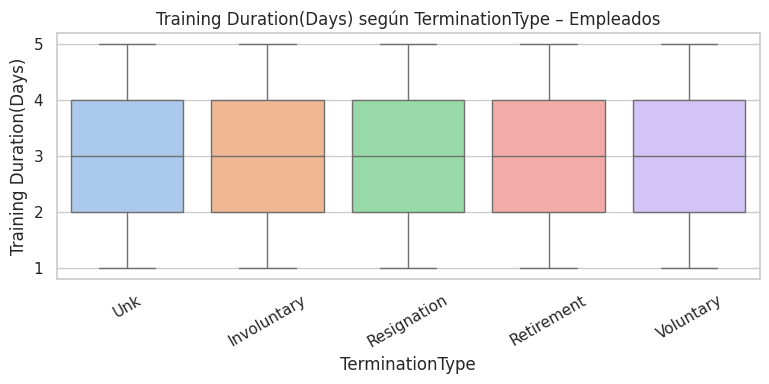

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


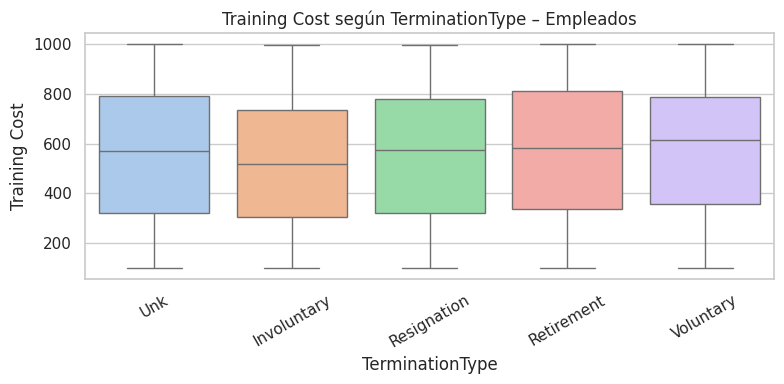

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


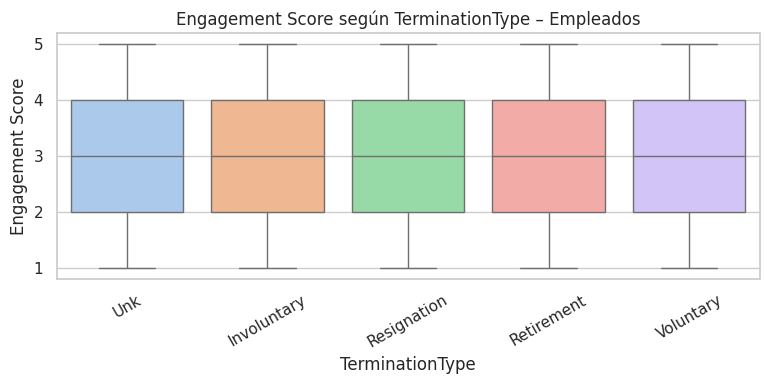

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


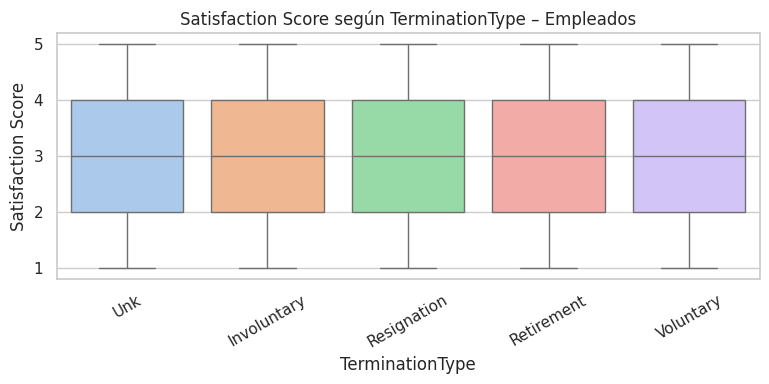

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


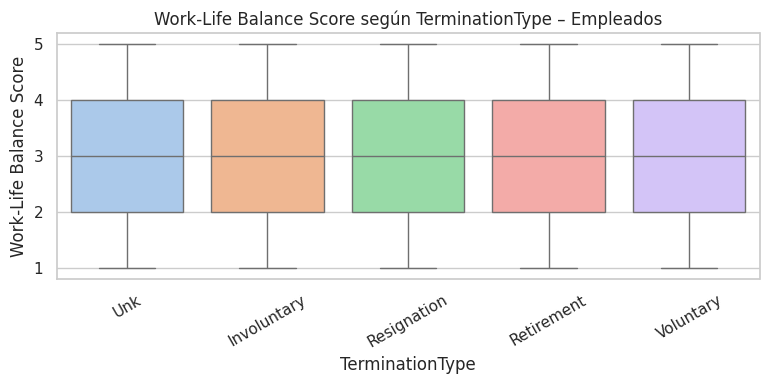

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


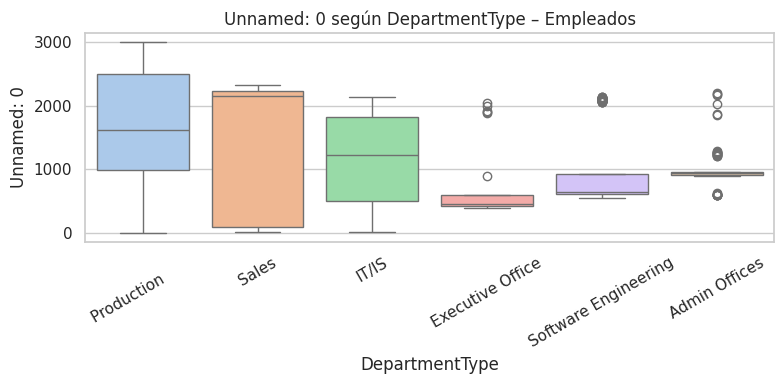

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


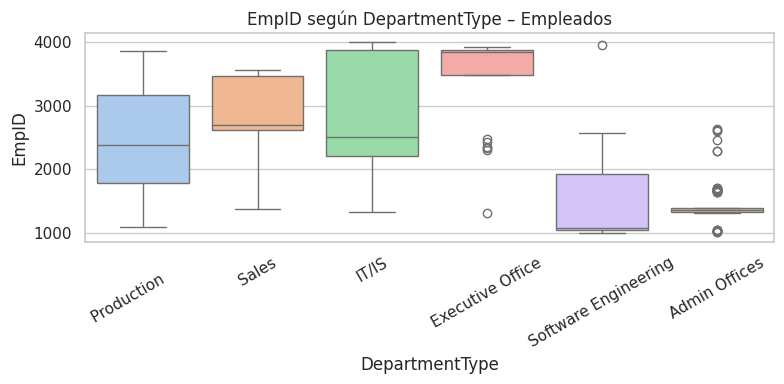

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


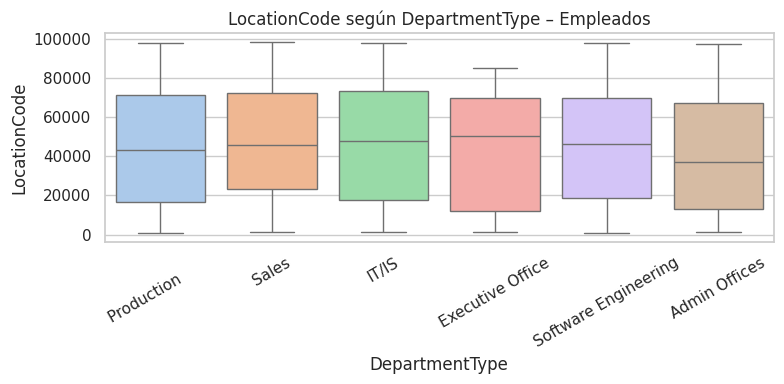

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


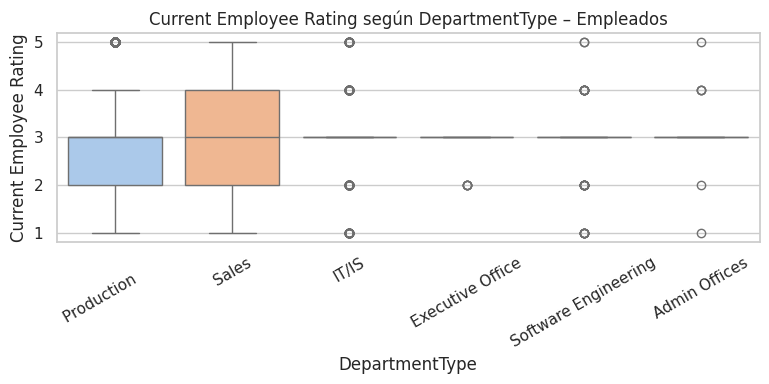

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


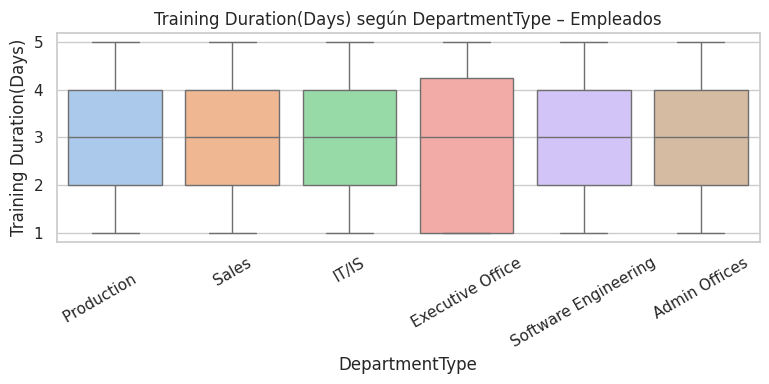

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


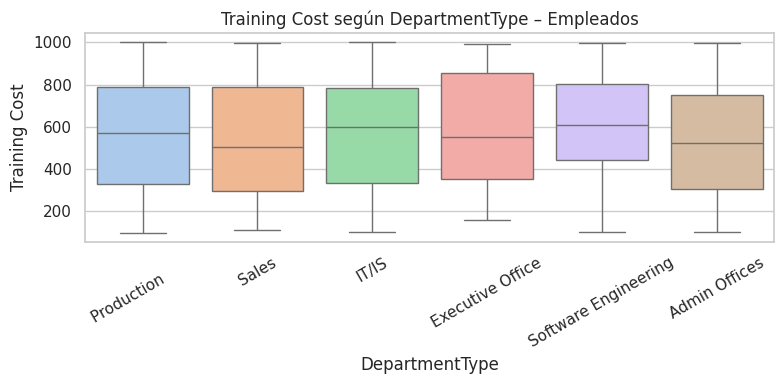

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


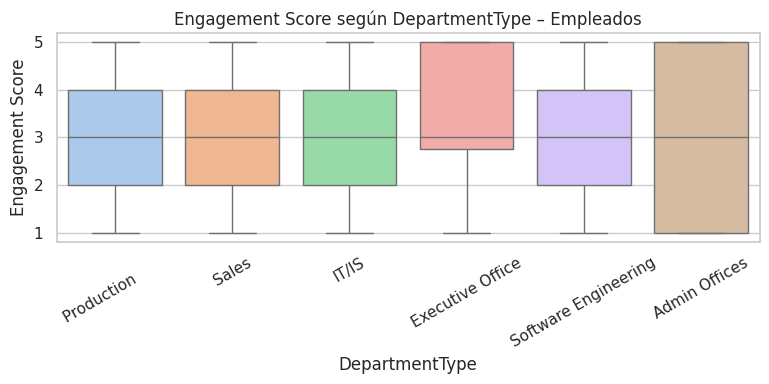

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


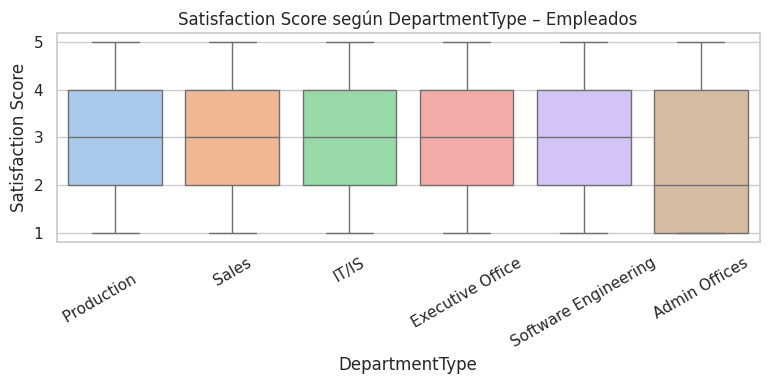

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


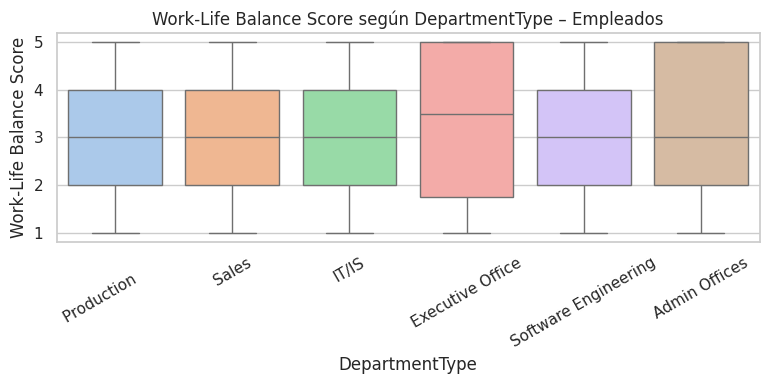

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


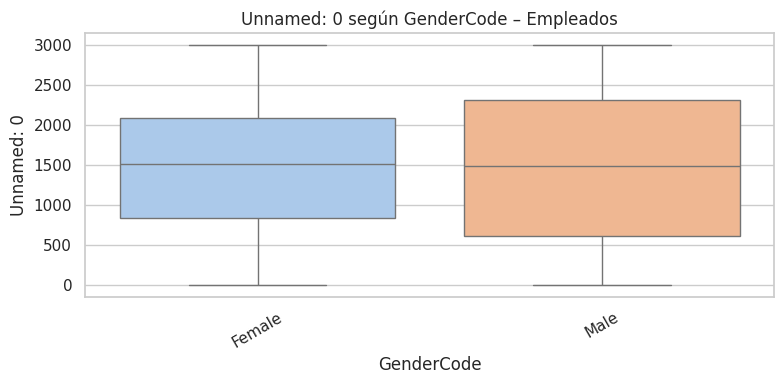

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


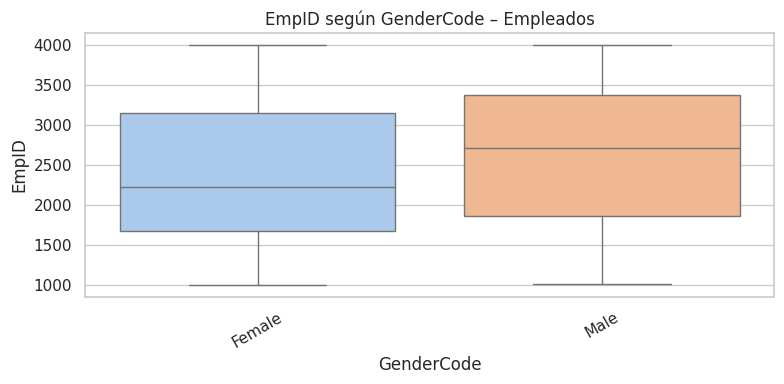

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


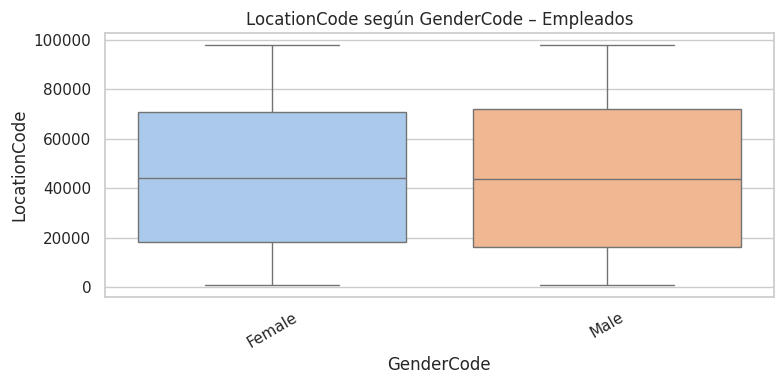

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


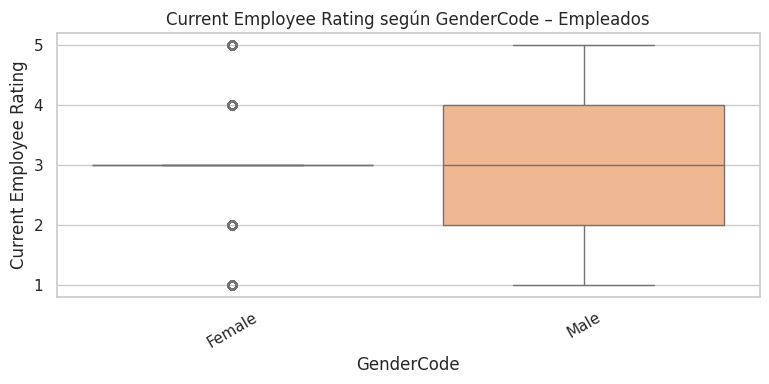

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


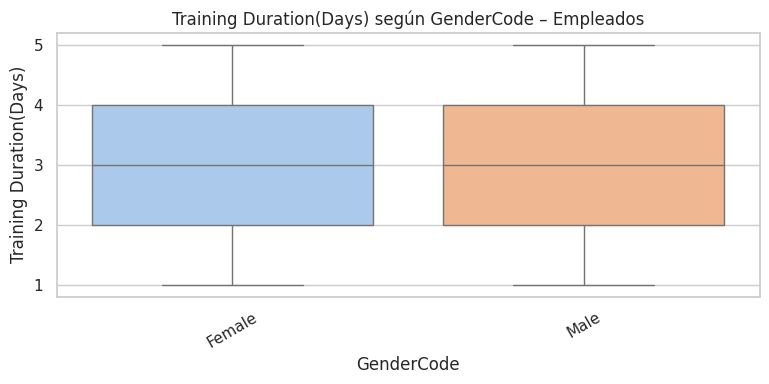

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


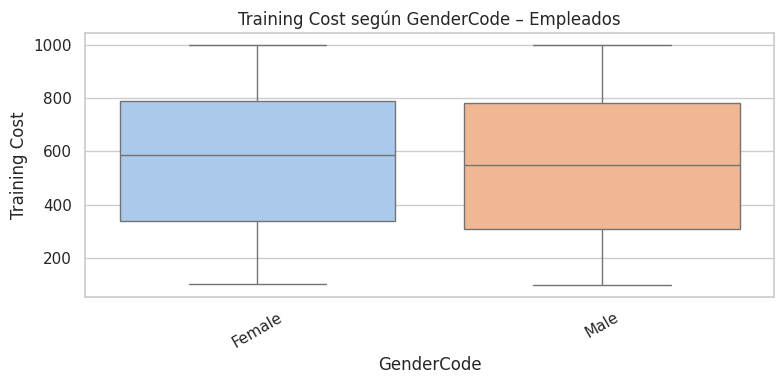

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


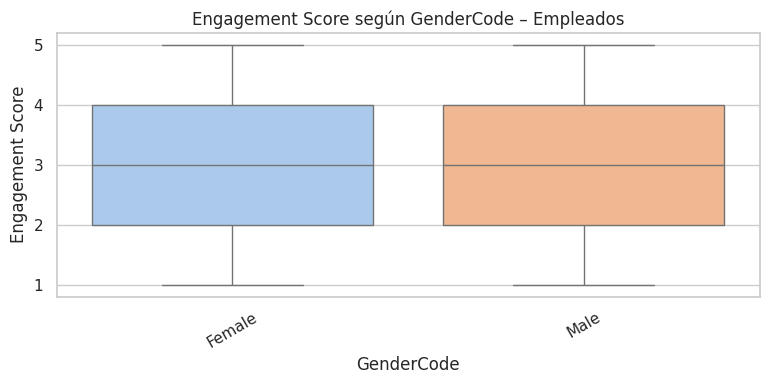

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


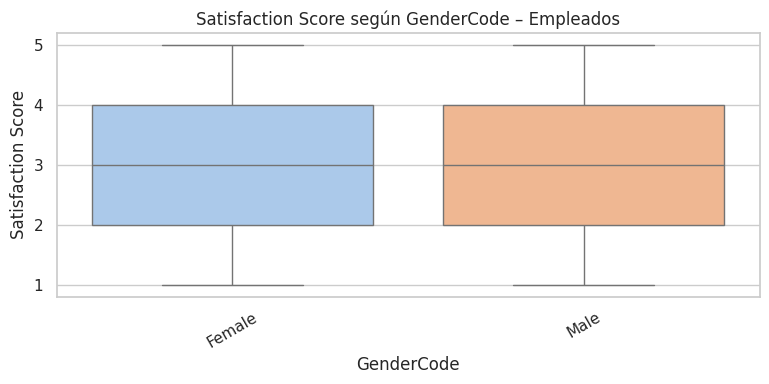

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


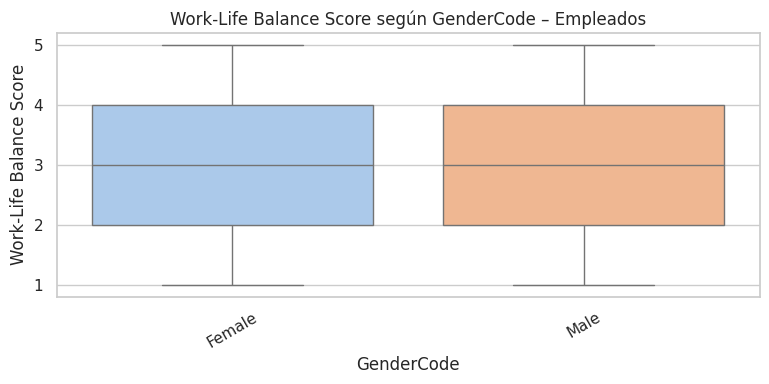

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


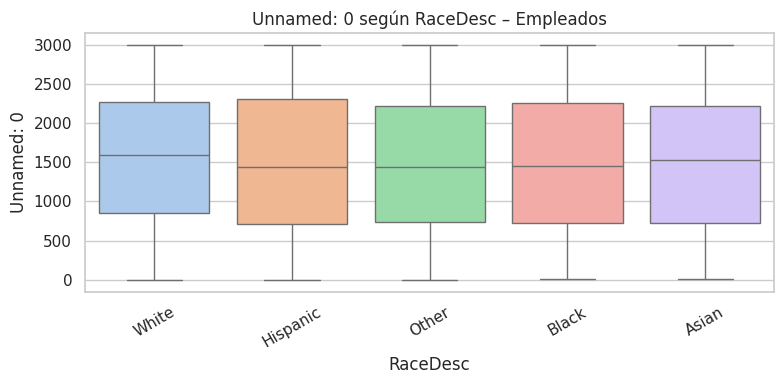

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


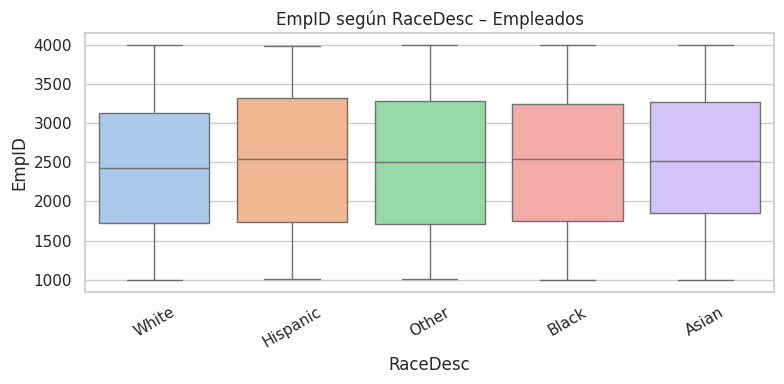

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


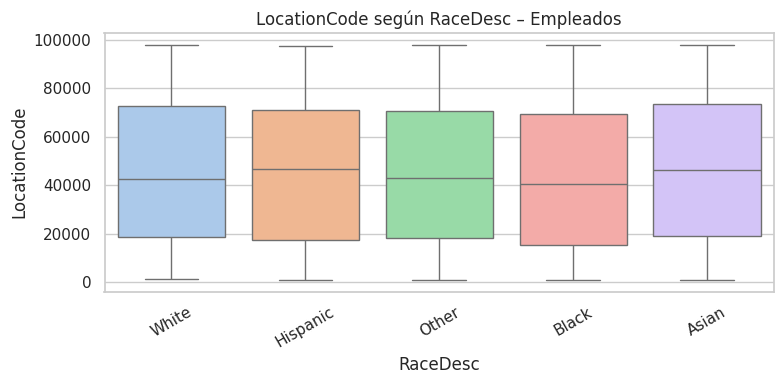

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


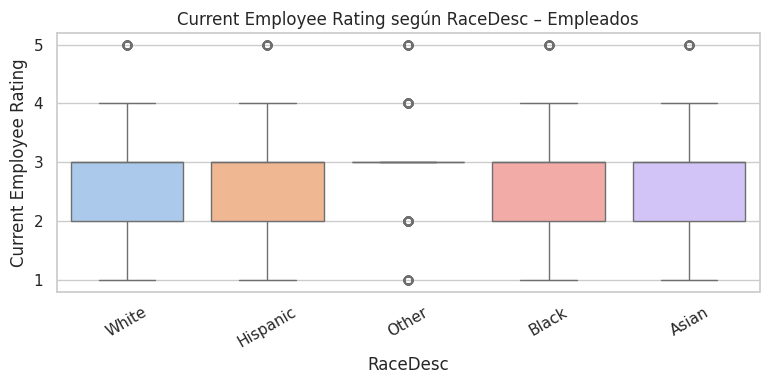

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


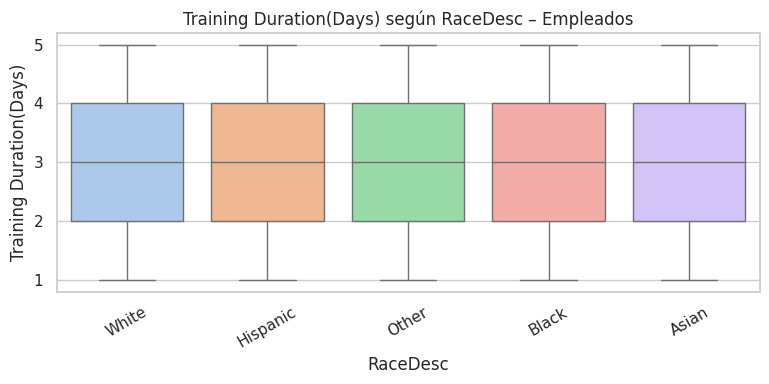

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


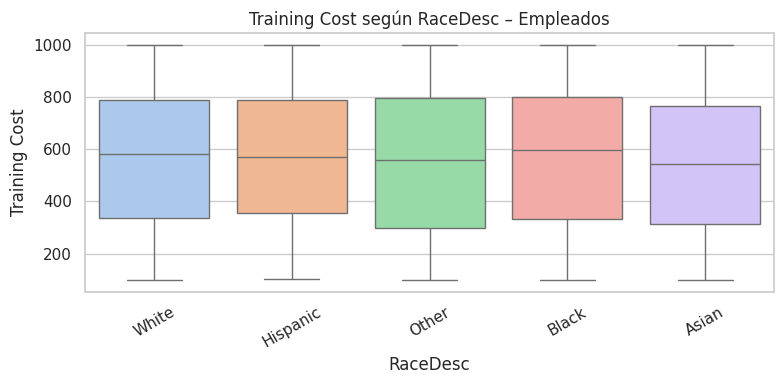

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


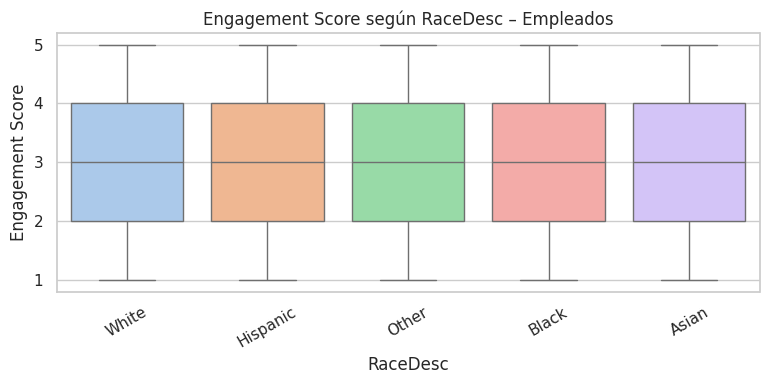

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


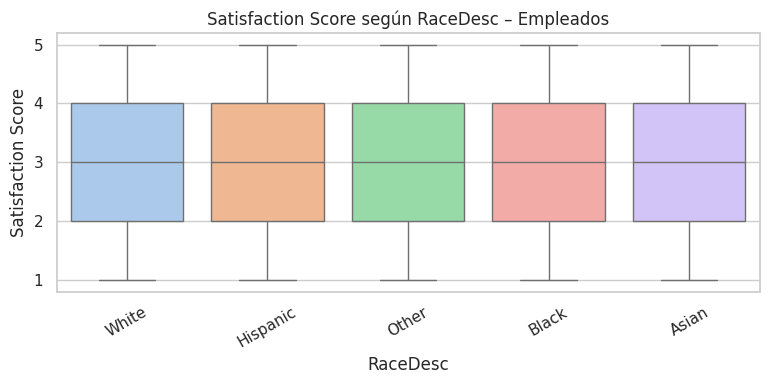

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


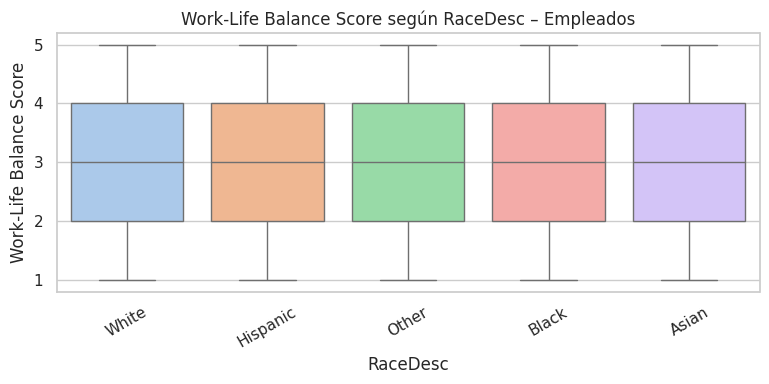

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


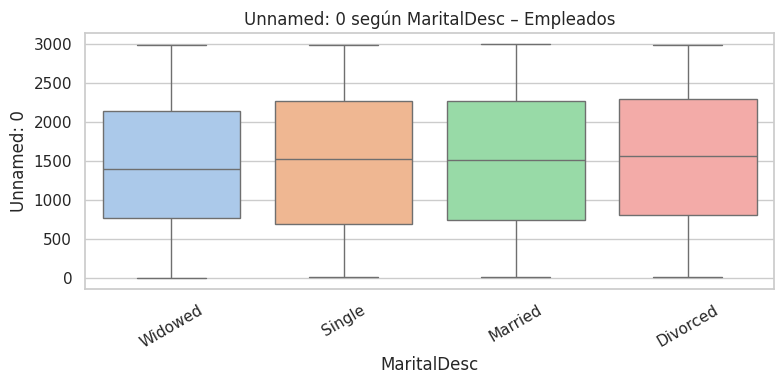

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


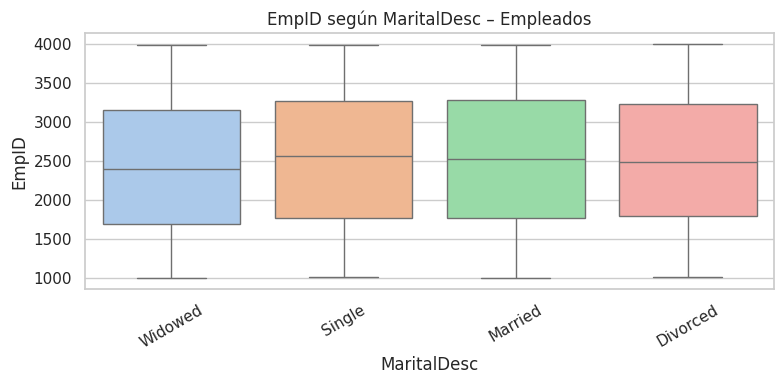

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


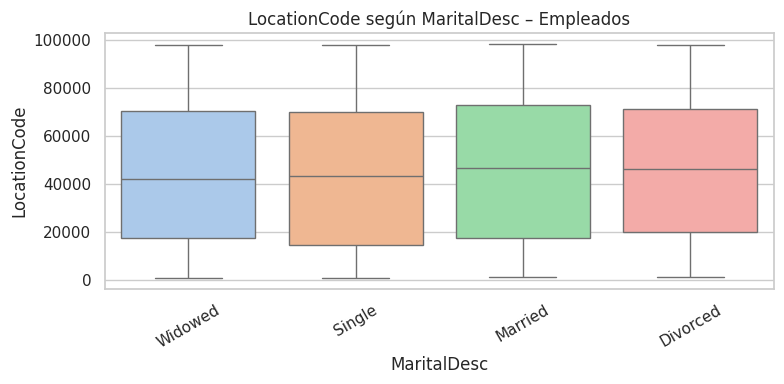

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


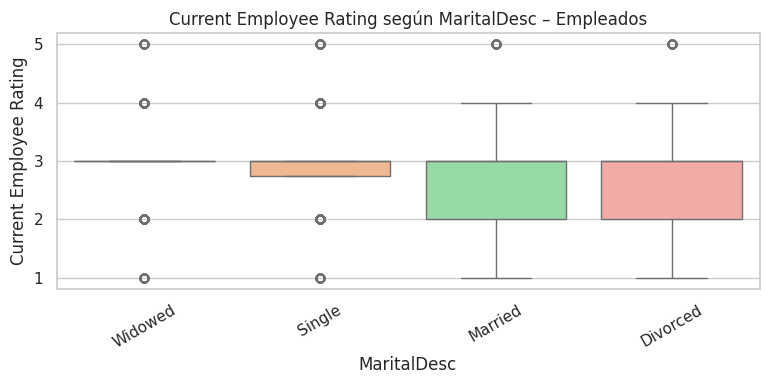

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


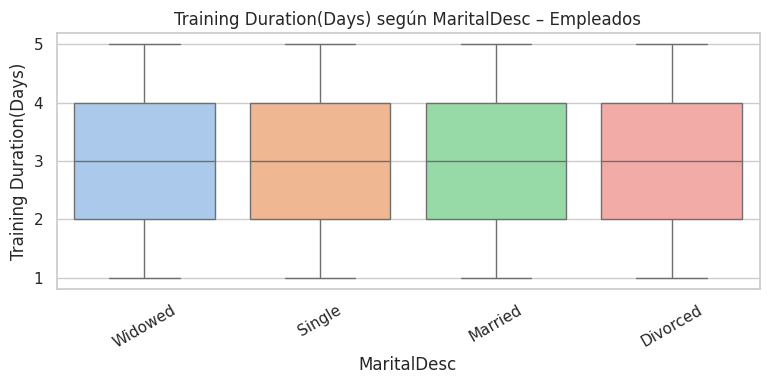

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


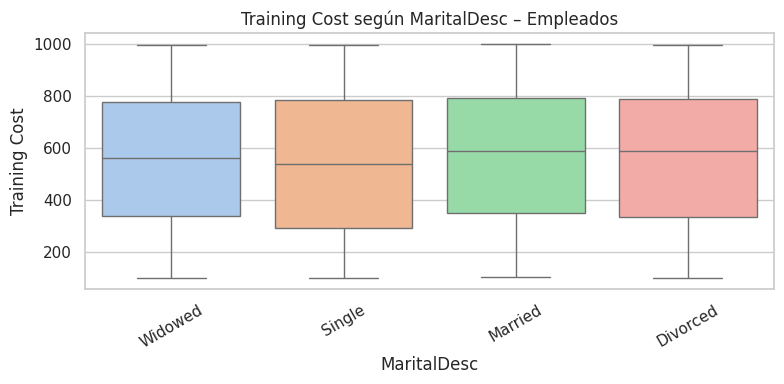

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


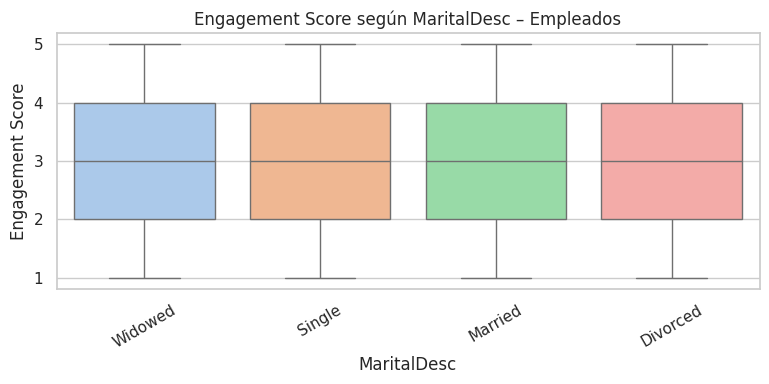

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


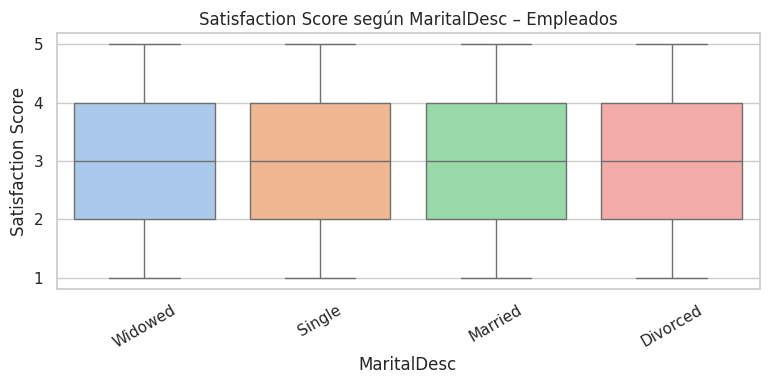

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


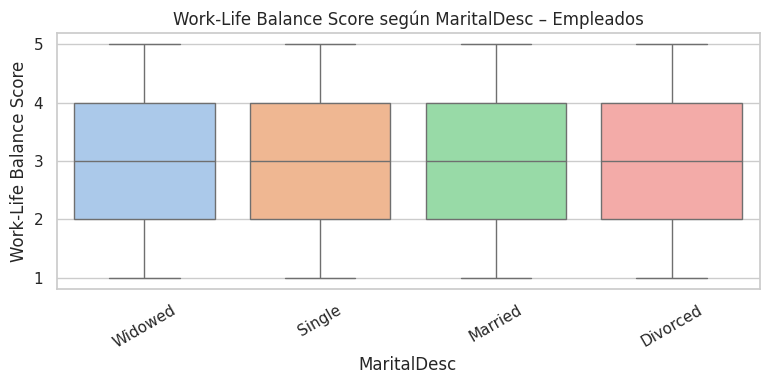

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


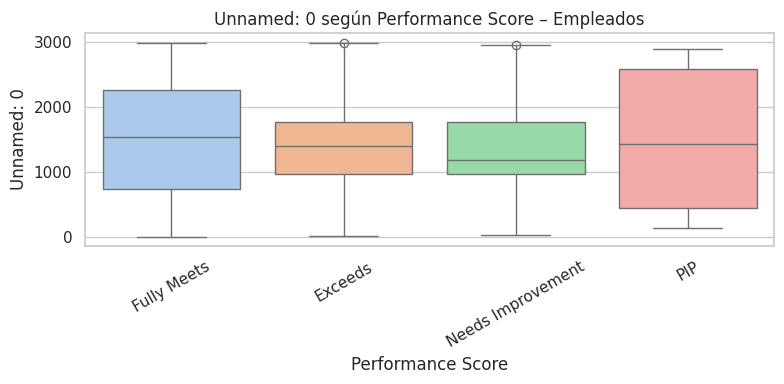

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


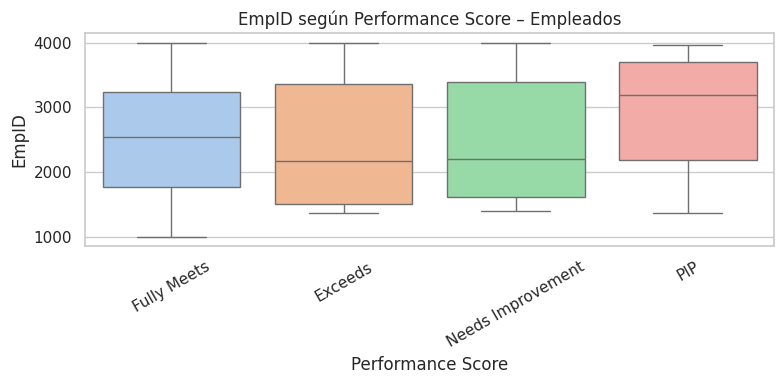

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


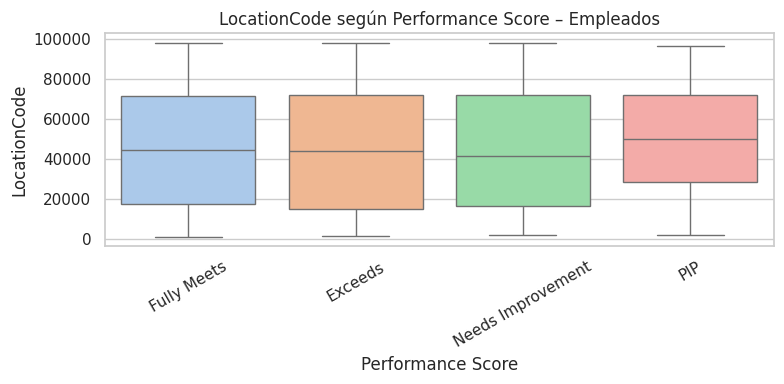

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


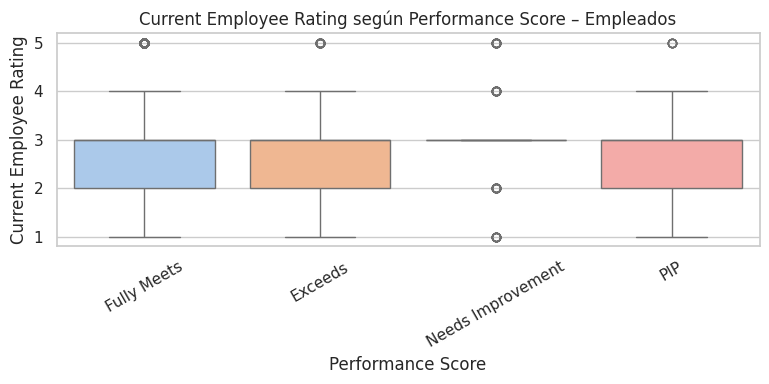

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


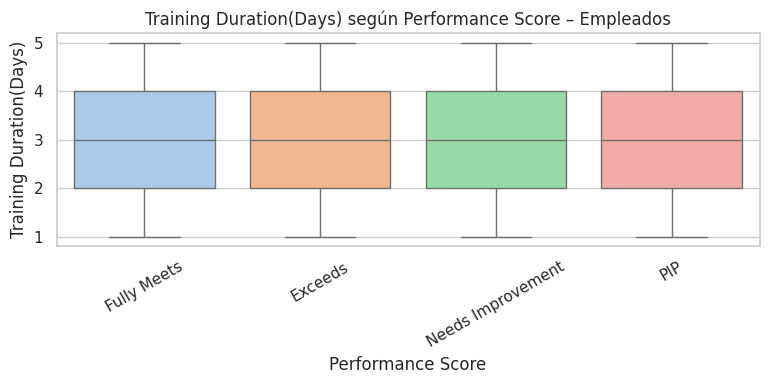

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


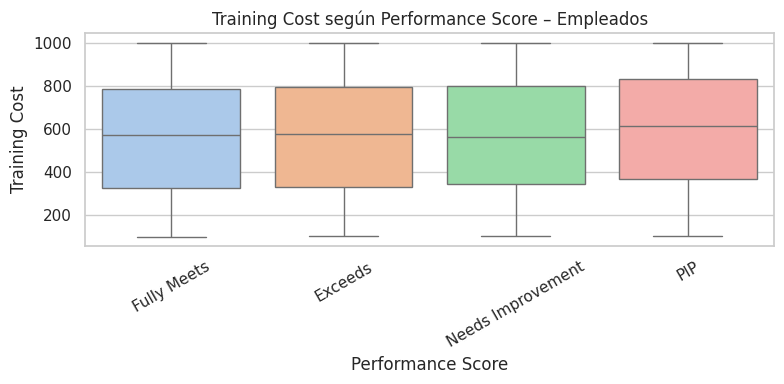

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


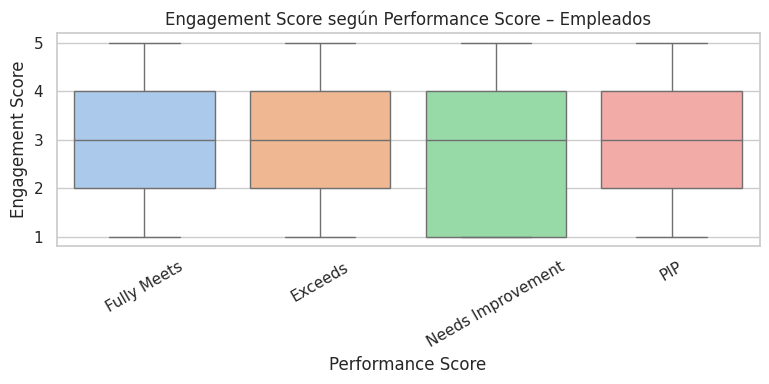

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


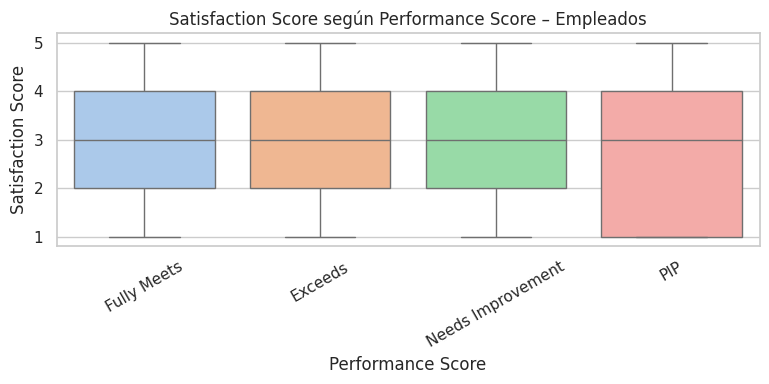

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


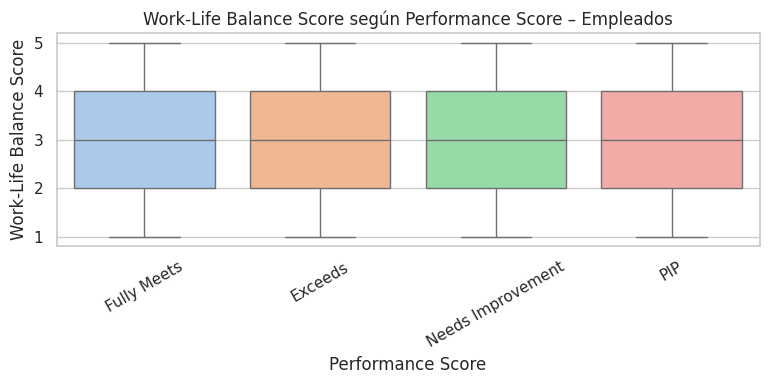

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


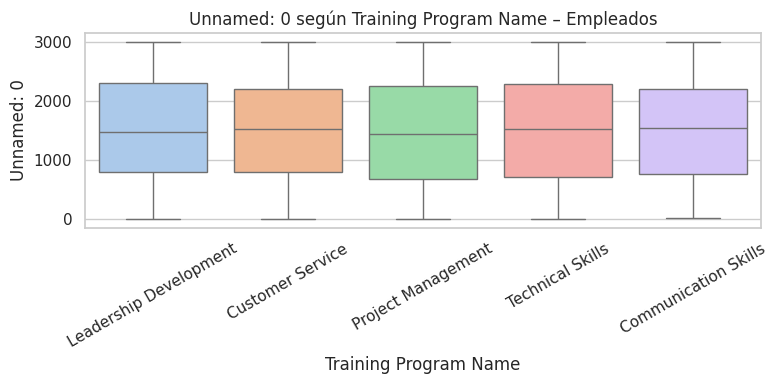

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


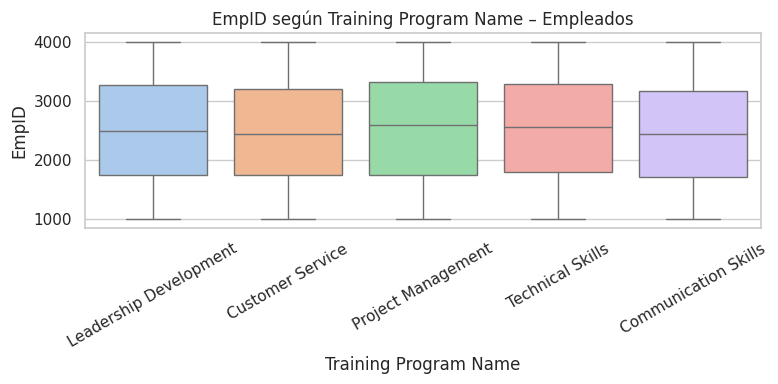

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


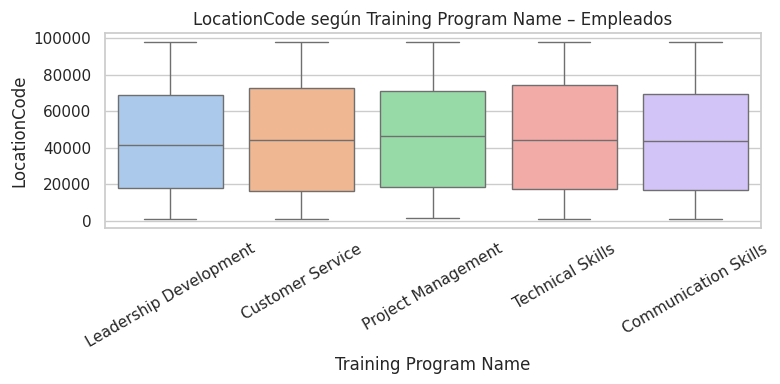

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


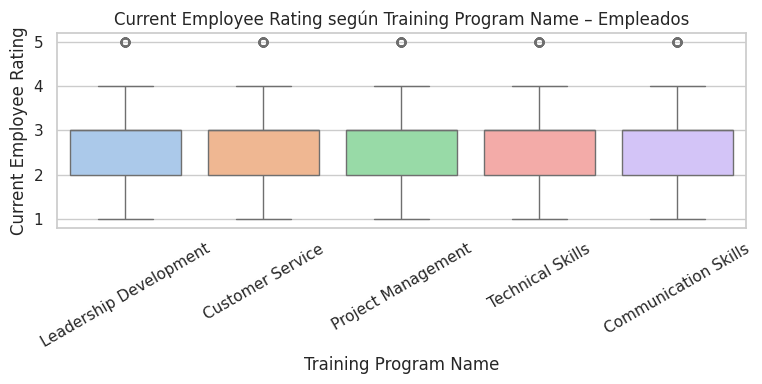

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


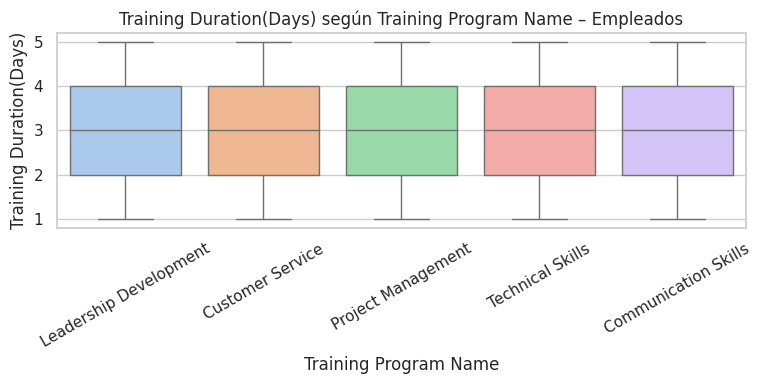

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


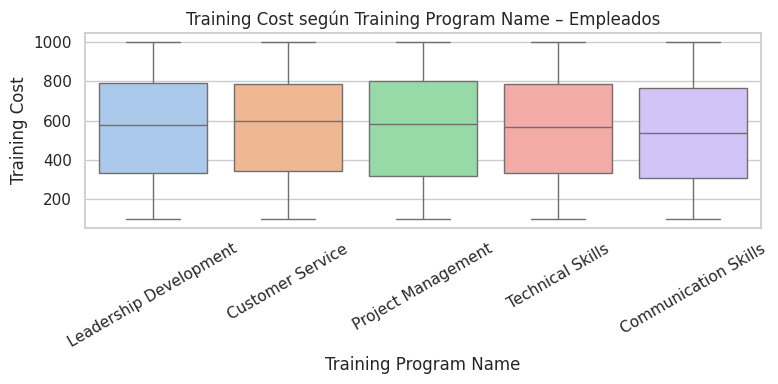

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


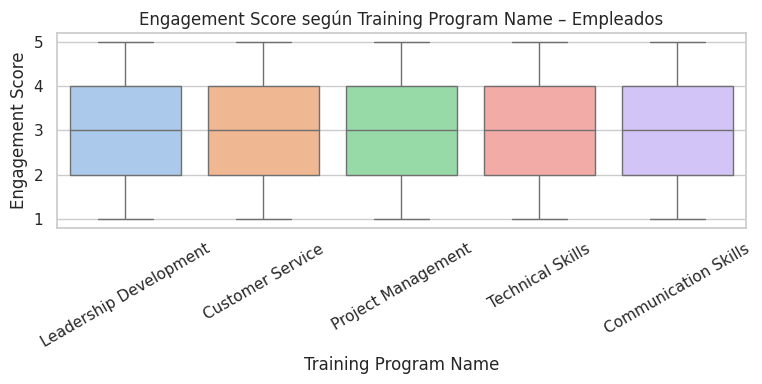

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


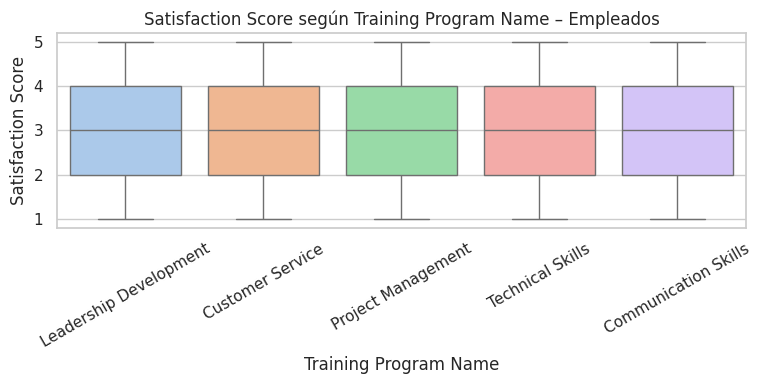

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


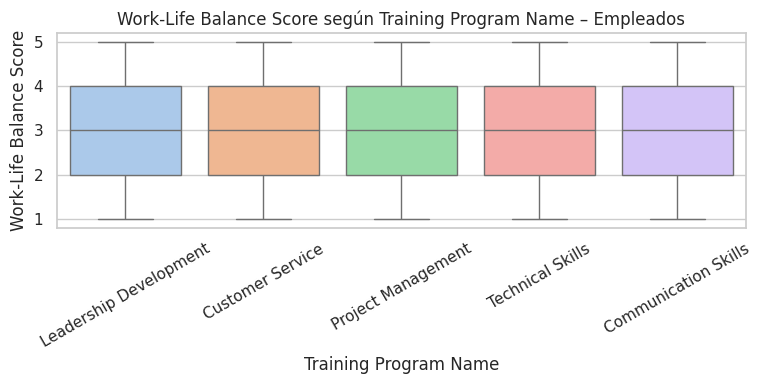

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


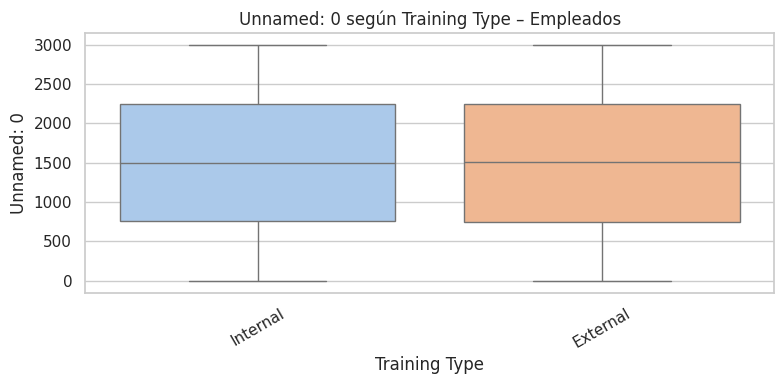

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


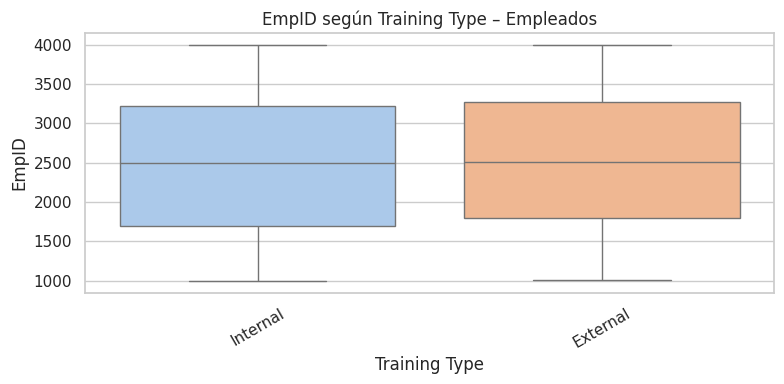

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


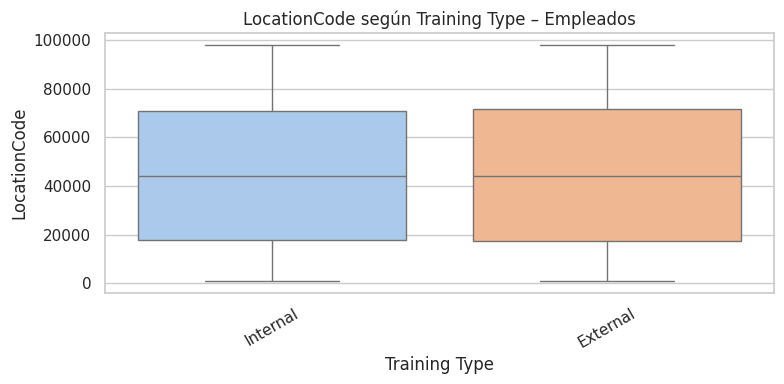

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


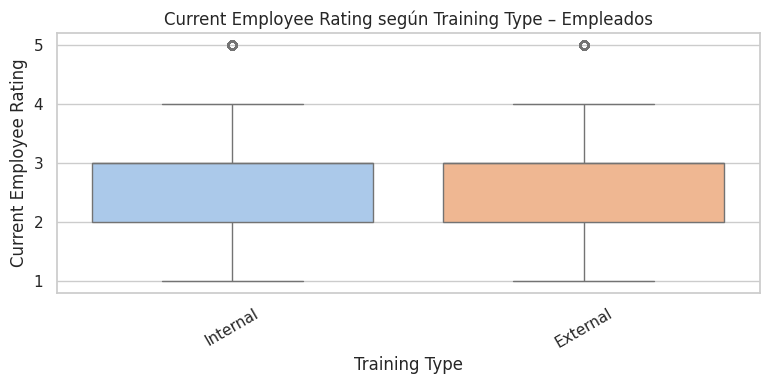

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


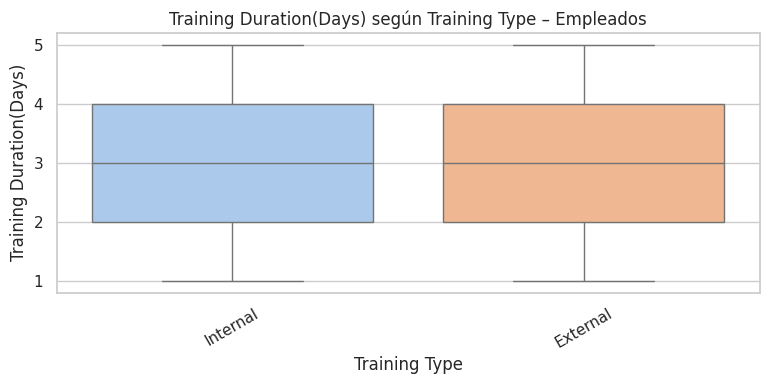

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


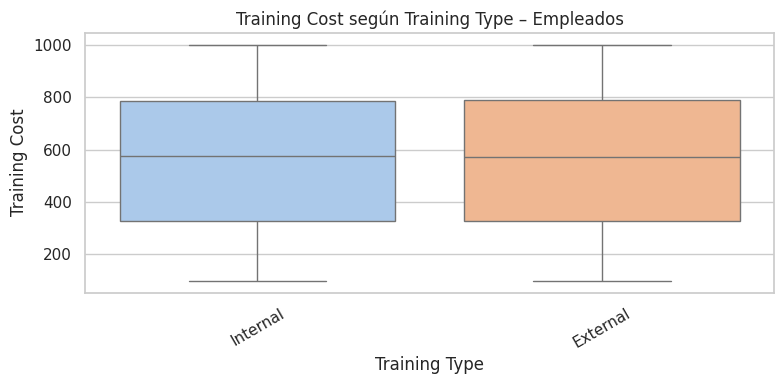

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


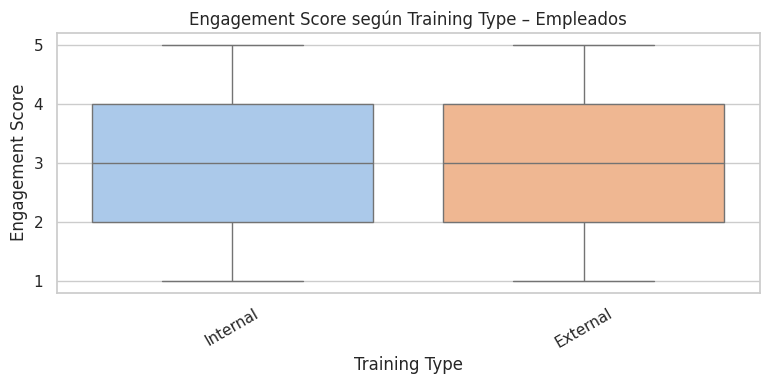

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


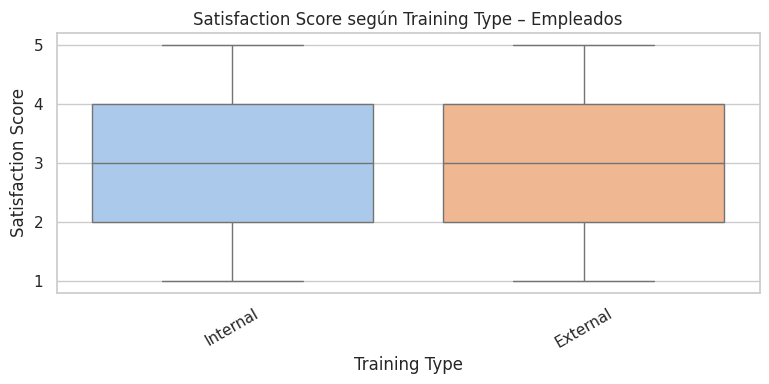

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


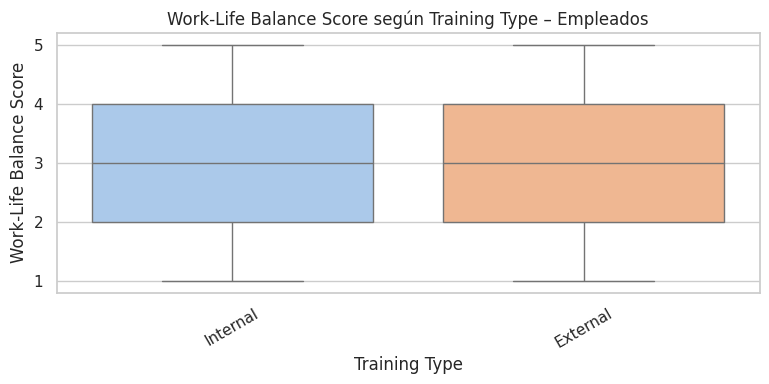

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


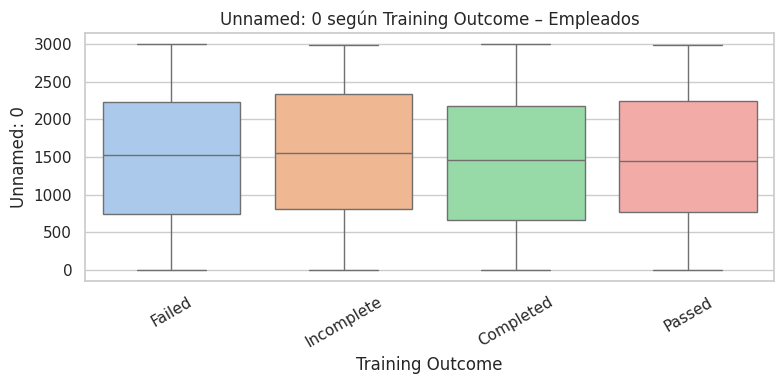

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


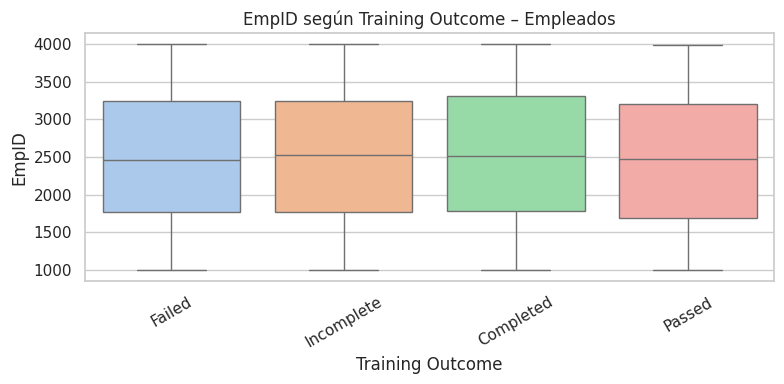

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


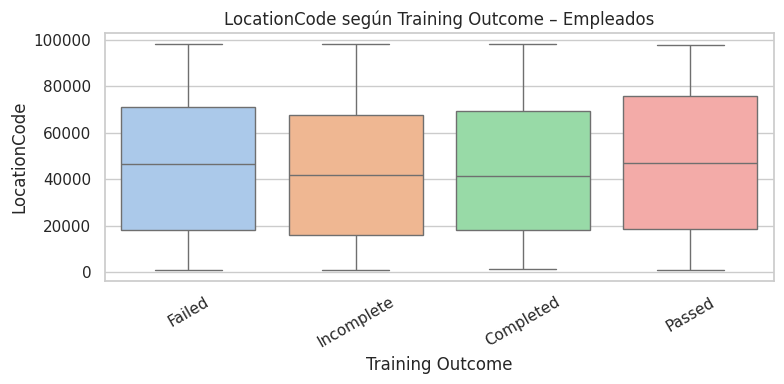

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


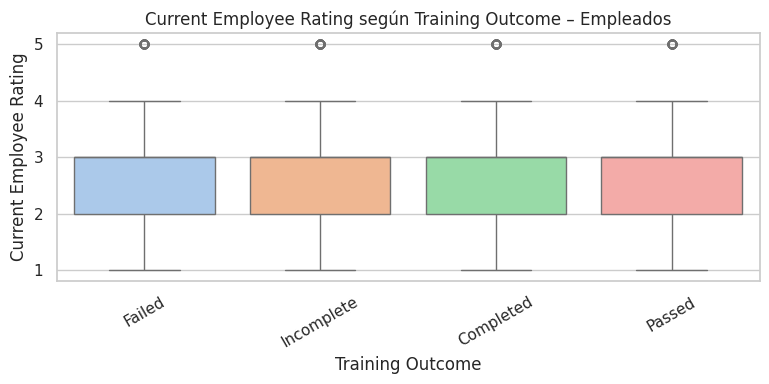

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


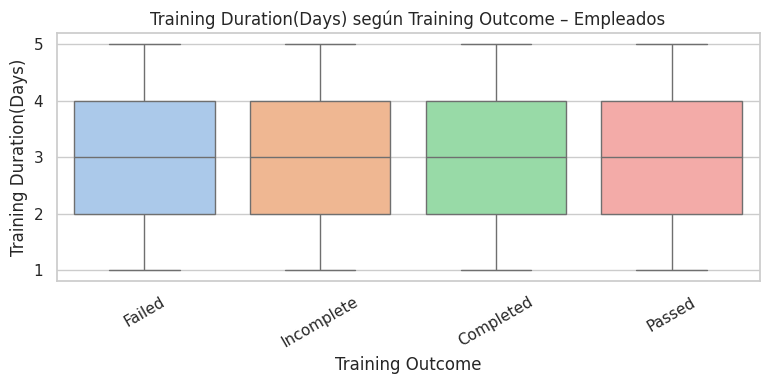

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


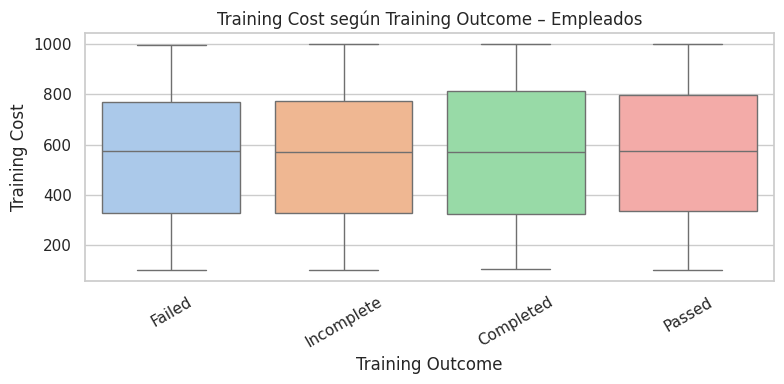

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


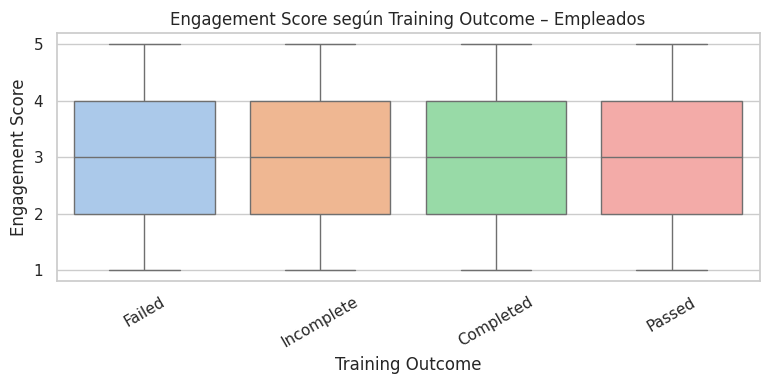

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


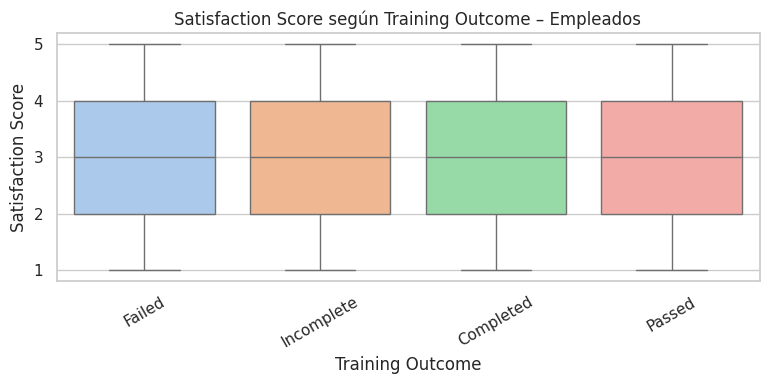

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


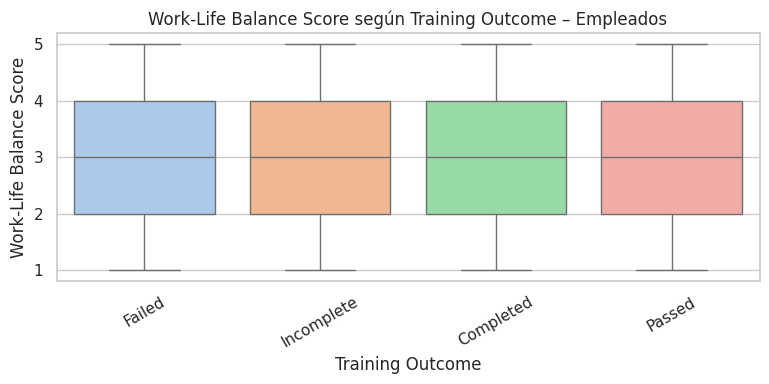

In [ ]:
# Empleados
print("\Correlaciones en EMPLEADOS")
matriz_correlacion(empleados, "Empleados")
boxplot_cat_num(empleados, "Empleados")

\Correlaciones en PROYECTOS


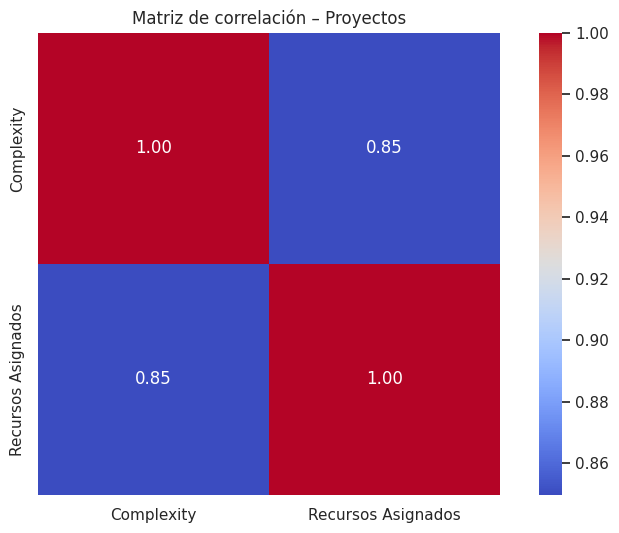

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


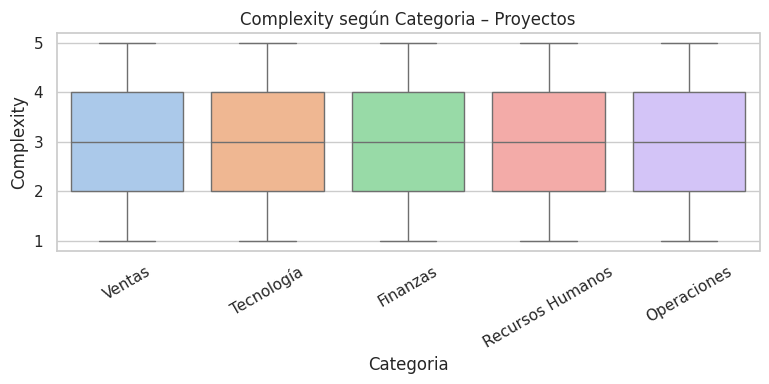

<ipython-input-25-6730e5042a5b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat, y=num, palette="pastel")


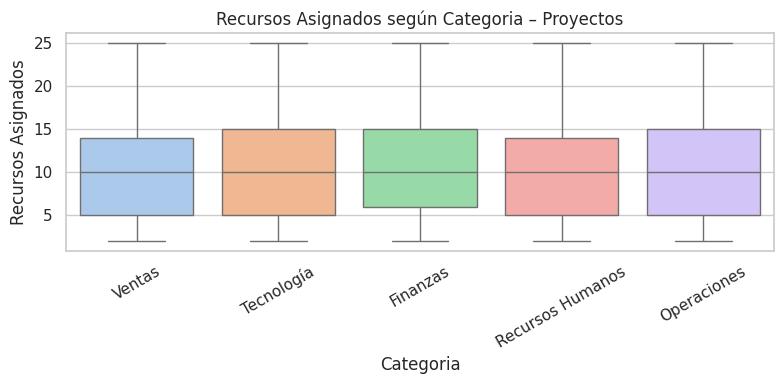

In [ ]:
# Proyectos
print("\Correlaciones en PROYECTOS")
matriz_correlacion(proyectos, "Proyectos")
boxplot_cat_num(proyectos, "Proyectos")

\Correlaciones en ASIGNACIONES


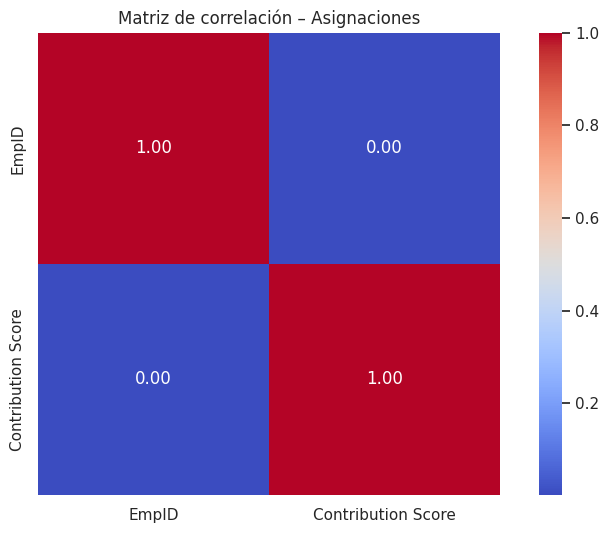

In [ ]:
# Asignaciones
print("\Correlaciones en ASIGNACIONES")
matriz_correlacion(asignaciones, "Asignaciones")
boxplot_cat_num(asignaciones, "Asignaciones")

# Preprocesamiento

Manejo de valores faltantes

In [ ]:
# EMPLEADOS: reemplazar ExitDate faltante por 'Activo'
empleados["ExitDate"] = empleados["ExitDate"].fillna("Activo")

In [ ]:
# TerminationDescription puede eliminarse si ExitDate = Activo
empleados["TerminationDescription"] = empleados.apply(
    lambda row: row["TerminationDescription"] if row["ExitDate"] != "Activo" else "No aplica", axis=1
)

Detección y ajustes de outliers

In [ ]:
# Usamos z-score para identificar valores extremos en variables numéricas
def detectar_outliers(df, threshold=3):
    z_scores = df.select_dtypes(include=["int64", "float64"]).apply(zscore)
    return (np.abs(z_scores) > threshold).sum().sort_values(ascending=False)

In [ ]:
print("\nValores potencialmente atípicos en empleados:")
print(detectar_outliers(empleados))


Valores potencialmente atípicos en empleados:
Unnamed: 0                 0
EmpID                      0
LocationCode               0
Current Employee Rating    0
Training Duration(Days)    0
Training Cost              0
Engagement Score           0
Satisfaction Score         0
Work-Life Balance Score    0
dtype: int64


In [ ]:
print("\nValores potencialmente atípicos en asignaciones:")
print(detectar_outliers(asignaciones))


Valores potencialmente atípicos en asignaciones:
EmpID                 0
Contribution Score    0
dtype: int64


Reducción de cardinalidad en categóricas

In [ ]:
# EMPLEADOS: reducir títulos menos comunes agrupando como "Otro"
top_titles = empleados["Title"].value_counts().nlargest(10).index
empleados["Title"] = empleados["Title"].apply(lambda x: x if x in top_titles else "Otro")

In [ ]:
# PROYECTOS: simplificar categorías si hay muchas
top_cats = proyectos["Categoria"].value_counts().nlargest(10).index
proyectos["Categoria"] = proyectos["Categoria"].apply(lambda x: x if x in top_cats else "Otro")


# Actualizamos datos finales

In [6]:
# Empleados
empleados["name"] = empleados["FirstName"] + " " + empleados["LastName"]
empleados["role"] = empleados["Title"]
empleados["experience_years"] = pd.to_datetime("2025-01-01") - pd.to_datetime(empleados["StartDate"], errors='coerce')
empleados["experience_years"] = empleados["experience_years"].dt.days // 365
empleados["skills"] = empleados[["Skill Principal", "Skill Secundaria", "Skill Adicional"]].values.tolist()
empleados["availability"] = empleados["ExitDate"].apply(lambda x: "Disponible" if x == "Activo" else "No disponible")
empleados["employee_id"] = empleados["EmpID"]

empleados_final = empleados[[
    "employee_id", "role", "experience_years", "skills", "availability"
]]

<ipython-input-6-34a009baccff>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  empleados["experience_years"] = pd.to_datetime("2025-01-01") - pd.to_datetime(empleados["StartDate"], errors='coerce')


In [8]:
# Proyectos
proyectos["project_id"] = proyectos["Project ID"]
proyectos["project_name"] = proyectos["Project Name"]
proyectos["category"] = proyectos["Categoria"]
proyectos["start_date"] = pd.to_datetime(proyectos["Start Date"], errors="coerce")
proyectos["end_date"] = pd.to_datetime(proyectos["End Date"], errors="coerce")
proyectos["complexity"] = proyectos["Complexity"]
proyectos["required_skills"] = proyectos["Skills"].apply(
    lambda x: [s.strip() for s in str(x).split(",")] if pd.notna(x) else []
)

proyectos_final = proyectos[[
    "project_id", "category", "start_date", "end_date", "complexity", "required_skills"
]]

In [10]:
# Asignaciones
asignaciones["assignment_id"] = ["A" + str(i).zfill(4) for i in range(1, len(asignaciones) + 1)]
asignaciones["assigned_role"] = asignaciones["Role"]
asignaciones["employee_id"] = asignaciones["EmpID"]
asignaciones["project_id"] = asignaciones["Project ID"]
asignaciones["contribution_score"] = asignaciones["Contribution Score"]

asignaciones_final = asignaciones[[
    "assignment_id", "project_id", "employee_id", "assigned_role", "contribution_score"
]]

In [7]:
# Mostrar datasets finales
empleados_final.head()

employee_id                     role  experience_years  \
0         3427  Production Technician I                 5   
1         3428  Production Technician I                 1   
2         3429       Area Sales Manager                 6   
3         3430       Area Sales Manager                 3   
4         3431       Area Sales Manager                 5   

                                              skills   availability  
0  [Mantenimiento, Control de Calidad, Análisis d...  No disponible  
1    [Calibración, Mantenimiento, Trabajo en Equipo]  No disponible  
2                          [ERP, Java, Comunicación]  No disponible  
3               [Power BI, SQL, Análisis de Mercado]  No disponible  
4  [Rutas de Distribución, Sistemas Operativos, N...  No disponible

In [9]:
proyectos_final.head()

project_id    category start_date   end_date  complexity  \
0      P0001      Ventas 2022-04-17 2022-09-20           1   
1      P0002      Ventas 2024-03-13 2024-06-06           4   
2      P0003  Tecnología 2022-10-03 2022-12-13           3   
3      P0004  Tecnología 2022-03-07 2022-07-22           3   
4      P0005  Tecnología 2022-05-11 2022-10-11           1   

                                    required_skills  
0                                             [CRM]  
1  [Presentaciones, Negociación, Comunicación, CRM]  
2                   [SQL, JavaScript, Python, HTML]  
3                               [HTML, SQL, Python]  
4                  [Java, Python, HTML, JavaScript]

In [11]:
asignaciones_final.head()

assignment_id project_id  employee_id            assigned_role  \
0         A0001      P0001         2418       Production Manager   
1         A0002      P0001         1021        Software Engineer   
2         A0003      P0002         2228               IT Support   
3         A0004      P0002         1617  Production Technician I   
4         A0005      P0002         2244     IT Manager - Support   

   contribution_score  
0                73.6  
1                63.8  
2                44.9  
3                44.2  
4                49.1